# Телеком — задача проекта

### План работы

1. [Описание проекта](#1)
2. [Краткое описание работы](#2)
3. [Знакомство с данными](#3)
4. [Предобработка данных](#4)
5. [Исследовательский анализ данных](#5)
    * [Исследование количественных признаков](#5_1)
    * [Исследование категориальных признаков](#5_2)
    * [Проверка гипотез](#5_3)
6. [Обучение моделей](#6)
    * [Подготовка к обучению моделей](#6_1);
    * [Первичное обучение](#6_2);
    * [Преобразование данных](#6_3)
    * [Финальное тестирование](#6_4)
7. [Общий вывод](#7)

## Описание проекта <a id="1"></a>

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (`DSL`, от англ. `digital subscriber line`, «цифровая абонентская линия») или оптоволоконный кабель (`Fiber optic`).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (`DeviceProtection`) и блокировка небезопасных сайтов (`OnlineSecurity`);
- Выделенная линия технической поддержки (`TechSupport`);
- Облачное хранилище файлов для резервного копирования данных (`OnlineBackup`);
- Стриминговое телевидение (`StreamingTV`) и каталог фильмов (`StreamingMovies`).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

### Краткое описание работы <a id="2"></a>

В данной работе выполняется знакомтсво с данными от заказчика, с последующей предобработкой данных. После предобработки проводится исследовательский анализ данных на определение портрета клиента, который уходит. Далее проводится первичное обучение моделей с последующей оценкой результатов. Далее рассматриваются возможные варианты оптимизации данных с целью удучшения метрики. После чего проводится финальное тестирование на полученном наборе данных с последующей оценкой результатов.

### Знакомство с данными <a id="3"></a>

Для начала познакомимся с данными, предоставленные командой оператора.

In [1]:
try:
    !pip install catboost
except:
    %pip install catboost

  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.1
    Uninstalling numpy-1.23.1:
      Successfully uninstalled numpy-1.23.1
^C


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

from scipy import stats as st

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from catboost import CatBoostClassifier

from lightgbm import LGBMClassifier

plt.rcParams["figure.figsize"] = (15,7.5)

In [ ]:
#contract = pd.read_csv('contract.csv')
#internet = pd.read_csv('internet.csv')
#personal = pd.read_csv('personal.csv')
#phone = pd.read_csv('phone.csv')

In [ ]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

Посмотрим на каждую таблицу отдельно. Для того, чтобы сформулировать первоначальные выводы, рассмотрим первые пять строк в таблице, общую информацию, а также на числовые характеристики каждого признака в таблице. 

Знакомство с данными позволит определить, какие проблемы набор данных имеет для дальнейшего анализа данных. 

In [ ]:
def info(df: pd.DataFrame):
    print(f'Информация:')
    print(f'Первые {len(df.head())} строк:')
    display(df.head())
    print('Общая информация:')
    df.info()
    print('Числовые характеристики: ')
    display(df.describe())
    print(f'Количество дубликатов: {df.duplicated().sum()}')

In [ ]:
def info_unique(df: pd.DataFrame):
    for col in df.columns:
        print(f'Уникальные значения для {col} :')
        print(df[col].unique())

**Contarct - информация о договоре**

In [ ]:
info(contract)

Информация:
Первые 5 строк:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
Числовые характеристики: 


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Количество дубликатов: 0


Посмотрим на уникальные значения признаков:

In [ ]:
info_unique(contract)

Уникальные значения для customerID :
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Уникальные значения для BeginDate :
['2020-01-01' '2017-04-01' '2019-10-01' '2016-05-01' '2019-09-01'
 '2019-03-01' '2018-04-01' '2019-04-01' '2017-07-01' '2014-12-01'
 '2019-01-01' '2018-10-01' '2015-04-01' '2015-09-01' '2018-01-01'
 '2014-05-01' '2015-10-01' '2014-03-01' '2018-05-01' '2019-11-01'
 '2019-02-01' '2016-01-01' '2017-08-01' '2015-12-01' '2014-02-01'
 '2018-06-01' '2019-12-01' '2017-11-01' '2019-06-01' '2016-04-01'
 '2017-02-01' '2018-12-01' '2014-04-01' '2018-09-01' '2014-11-01'
 '2016-07-01' '2015-02-01' '2018-07-01' '2014-08-01' '2016-03-01'
 '2018-08-01' '2014-10-01' '2015-06-01' '2016-08-01' '2019-05-01'
 '2017-03-01' '2016-02-01' '2017-09-01' '2014-09-01' '2017-12-01'
 '2016-12-01' '2017-06-01' '2015-05-01' '2016-10-01' '2016-09-01'
 '2019-08-01' '2019-07-01' '2017-05-01' '2017-10-01' '2014-07-01'
 '2018-03-01' '2015-01-01' '2018-11-01' '2015-03-0

На основе признаков в таблице сформируем обозначение признаков:

* `BeginDate` - дата начала договора в формате `YYYY-MM-DD`;
* `EndDate` - дата окончания договора:
    - дата окончания договора в формате `YYYY-MM-DD`
    - `No` - означает, что договор еще действует.
* `PaperlessBilling` - выставление электронного чека:
    * `No` - выдан бумажный чек или не выдавался вовсе;
    * `Yes` - выдан электронный чек.
* `PaymentMethod` - способы оплаты:
    * `Electronic check` - платеж с помощью внутренней платежной системы;
    * `Mailed check` - с помощью почтового перевода;
    * `Bank Transfer` - банковский перевод;
    * `Credit Card` - с помощью банковской карты.
* `MonthlyCharges` - ежемесячная плата;
* `TotalCharges` - общая сумма всех плат за пользование услуг.




**Internet - информация об интернет-услугах**

In [ ]:
info(internet)

Информация:
Первые 5 строк:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
Числовые характеристики: 


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,6267-DCFFZ,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


Количество дубликатов: 0


Посмотрим на уникальные значения признаков:

In [ ]:
info_unique(internet)

Уникальные значения для customerID :
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Уникальные значения для InternetService :
['DSL' 'Fiber optic']
Уникальные значения для OnlineSecurity :
['No' 'Yes']
Уникальные значения для OnlineBackup :
['Yes' 'No']
Уникальные значения для DeviceProtection :
['No' 'Yes']
Уникальные значения для TechSupport :
['No' 'Yes']
Уникальные значения для StreamingTV :
['No' 'Yes']
Уникальные значения для StreamingMovies :
['No' 'Yes']


Обозначение признаков в таблице:

* `InternerService` - тип подключения к интернету:
    * `DSL` - телефонная линия;
    * `FiberOptic` - оптоволоконная связь;
* `OnlineSecurity` - дополнительная услуга: блокировка небезопасных сайтов
    * `Yes` - подключена;
    * `No` - не подключена;
* `OnlineBackup` - дополнительная услуга: облачное хранлище данных
    * `Yes` - подключена;
    * `No` - не подключена;
* `DeviceProtection` - дополнительная услуга: защита устройства
    * `Yes` - подключена;
    * `No` - не подключена;
* `TechSupport` - дополнительная услуга: техническая поддержка
    * `Yes` - подключена;
    * `No` - не подключена;
* `StreamingTV` - дополнительная услуга: трансляция ТВ
    * `Yes` - подключена;
    * `No` - не подключена;
* `StreamingMovies` - дополнительная услуга: трансляция фильмов
    * `Yes` - подключена;
    * `No` - не подключена;

**Personal - персональные данные клиента**

In [ ]:
info(personal)

Информация:
Первые 5 строк:


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
Числовые характеристики: 


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Количество дубликатов: 0


Посмотрим на уникальные значения признаков:

In [ ]:
info_unique(personal)

Уникальные значения для customerID :
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Уникальные значения для gender :
['Female' 'Male']
Уникальные значения для SeniorCitizen :
[0 1]
Уникальные значения для Partner :
['Yes' 'No']
Уникальные значения для Dependents :
['No' 'Yes']


Рассмотрим описание признаков для таблицы:

* `gender` - пол клиента:
    * `Female` - женский;
    * `Male` - мужской;
* `SeniorCitizen` - возраст клиента (класс):
    * `0` - клиент не пенсионного возраста;
    * `1` - клиент пенсионного возраста;
* `Partner` - наличие партнера:
    * `Yes` - есть партнер;
    * `No` - нет партнера;
* `Dependents` - статус клиента:
    * `Yes` - иждивенец;
    * `No` - не иждивенец;

**Phone - информация об услугах телефонии**

In [ ]:
info(phone)

Информация:
Первые 5 строк:


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
Числовые характеристики: 


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,6353-BRMMA,No
freq,1,3390


Количество дубликатов: 0


Посмотрим на количество уникальных признаков:

In [ ]:
info_unique(phone)

Уникальные значения для customerID :
['5575-GNVDE' '3668-QPYBK' '9237-HQITU' ... '2234-XADUH' '8361-LTMKD'
 '3186-AJIEK']
Уникальные значения для MultipleLines :
['No' 'Yes']


Посмотрим на описание признаков в данной таблице:

* `MultipleLines` - подключение телефона к нескольким линиям связи одноврменно
    * `Yes` - подключена;
    * `No` - не подключена;

### Общий вывод

В начале мы познакомимлись с данными, представленные заказчиком. В результате знакомства определили значения полей. Посмотрели на набор данных, оценили числовые характеристики, увидели униклаьные значения признаков для каждой таблицы, а также провели проверку на явные дубликаты.

Однако обнаружили ряд проблем, из-за которых нельзя приступить к исследовательскому анализу данных, а также к формированию прогноза оттока клиентов.

|**Таблица**  |**Обнаруженные прроблемы**|**Вариант решения проблемы**|
|:---------:  |:------------------------ |:-------------------------- |
|**Contract**|**Имеется некорректный тип данных для некоторых признаков**|**изменить тип данных**|
|             |`BeginDate`:`object`|Привести к типу `datetime`|
|             |`EndDate`:`object`|Привести к типу `datetime`|
|             |`TotalCharges`:`object`|Привести к типу `float`|
|             |**Категориальный признак `PaperlessBilling` представлен в некорректном виде**|**привести к соответствующим значениям**|
|             |                                                                         |`0` - `No`                          | 
|             |                                                                         |`1` - `Yes`                         | 
|**Internet** |**Категориальные признаки представлены в некорректном виде**|**привести к соответствующим значениям**         |
|             |                                                                         |`0` - `No`                          | 
|             |                                                                         |`1` - `Yes`                         | 
|**Personal** |**Категориальные признаки представлены в некорректном виде**|**привести к соответствующим значениям**         |
|             |                                                                         |`0` - `No`                          | 
|             |                                                                         |`1` - `Yes`                         | 
|**Phone**    |**Категориальные признаки представлены в некорректном виде**|**привести к соответствующим значениям**         |
|             |                                                                         |`0` - `No`                          | 
|             |                                                                         |`1` - `Yes`                         |
|**Common issues**|**Нет целевого признака**|**сформировать целвой признак**|

Таким образом, можно сказать, что полученные данные не готовы для проведения исследовательского анализа данных с дальнейшим прогнозиирования целевой метрики

### Предобработка данных <a id="4"></a>

Перед проведения исследовательского анализа данных, необходимо провести предобработку данных. Для этого рассмотрим каждую таблицу по отдельности и исправим предложенным вариантом имеющиеся проблемы.

**Contracts**

**Приведение данных к соответствующему типу**

In [ ]:
try:
    contract.BeginDate = pd.to_datetime(contract.BeginDate)
    contract.TotalCharges = pd.to_numeric(contract.TotalCharges, errors='coerce')
    contract.EndDate = pd.to_datetime(contract.EndDate)
except Exception as e:
    print(e)

Unknown string format: No


In [ ]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 440.3+ KB


При преобразовании данных видим следующее:

* у нас появились пропуски в столбце `TotalCharges`;
* не удалось преобразовать данные (столбец `EndDate`) к соотвествующему типу

Для начала посмотрим на данные, в которых столбец `TotalCharges` имеет пропуски.

In [ ]:
contract[contract.TotalCharges.isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


Видим следующее: все пропуски в данном столбце связаны с тем, что это новые клиенты компании, которые на момент выгрузки данных (1 февраля 2020) оформили договоры, поэтому от новых клиентов можно избавиться. Удалим все наблюдения.

In [ ]:
contract = contract.dropna(subset = ['TotalCharges']).reset_index(drop = True)

In [ ]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   object        
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 439.6+ KB


Удалили новых клиентов. Теперь посмотрим на столбец `EndDate`

In [ ]:
contract.EndDate.unique()

array(['No', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

Видим, что у нас есть аномальное значение `No`. Посмотрим на некоторые наблюдения.

In [ ]:
contract[contract.EndDate == 'No'].head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.90


Видим, что значение `No` - представляет собой отсутствие закрытие договора с этим клиентом. Для преобразования в соответсвтующий тип преобразуем это значение в пропуск.

In [ ]:
contract.loc[contract.EndDate == 'No', 'EndDate'] = np.nan
contract.EndDate = pd.to_datetime(contract.EndDate)

In [ ]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 439.6+ KB


In [ ]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65


Видим, что данные приведены к соответствующему типу. Появились пропуски в столбце `EndDate`, показывающий, что клиент не рассторгнул контракт.

**Приведение признаков к корректному формату**

Теперь приведем к корректному виду значения признака `PaperlessBilling`.

In [ ]:
contract.PaperlessBilling = contract.PaperlessBilling.map({'No': 0,
                                                          'Yes' : 1}).astype('int8')

In [ ]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int8          
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int8(1), object(3)
memory usage: 391.6+ KB


В результате предобработки сделали следующее:

* **Привели тип данных к корректному типу**:
    * `BeginDate` - `datetime`;
    * `EndDate` - `datetime`;
    * `TotalCharges` - `float`;
    
* **Привели категориальный признак к соответствующему типу**:
    * `No` - `0`;
    * `Yes` - `1`;

**Internet**

**Приведение признаков к корректному формату**

Теперь приведем категориальные признаки к корректному формату в таблице `Internet`. 

Для этого вспомним как выглядит наша таблица:

In [ ]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Предлагается сделать следующее: заменить значения некоторых признаков на:

* `No` - `0`;
* `Yes` - `1`;

In [ ]:
change_param = {'Yes' : 1,
                'No' : 0}
list_names = ['OnlineSecurity', 
              'OnlineBackup',
             'DeviceProtection',
             'TechSupport',
             'StreamingTV',
             'StreamingMovies']

for name in list_names:
    internet[name] = internet[name].map(change_param).astype('int8')

In [ ]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,0,1,0,0,0,0
1,5575-GNVDE,DSL,1,0,1,0,0,0
2,3668-QPYBK,DSL,1,1,0,0,0,0
3,7795-CFOCW,DSL,1,0,1,1,0,0
4,9237-HQITU,Fiber optic,0,0,0,0,0,0


In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   int8  
 3   OnlineBackup      5517 non-null   int8  
 4   DeviceProtection  5517 non-null   int8  
 5   TechSupport       5517 non-null   int8  
 6   StreamingTV       5517 non-null   int8  
 7   StreamingMovies   5517 non-null   int8  
dtypes: int8(6), object(2)
memory usage: 118.7+ KB


В результате предобработки сделали следующее:

* **Привели категориальный признак к соответствующему типу**:
    * `No` - `0`;
    * `Yes` - `1`;

**Personal**

**Приведение признаков к корректному формату**

Теперь приведем категориальные признаки к корректному формату в таблице `Personal`. 

Для этого вспомним как выглядит наша таблица:

In [ ]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Предлагается сделать следующее: заменить значения некоторых признаков на:

* `No` - `0`;
* `Yes` - `1`;

In [ ]:
list_names = ['Partner',
              'Dependents']

for name in list_names:
    personal[name] = personal[name].map(change_param).astype('int8')

In [ ]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,1,0
1,5575-GNVDE,Male,0,0,0
2,3668-QPYBK,Male,0,0,0
3,7795-CFOCW,Male,0,0,0
4,9237-HQITU,Female,0,0,0


In [ ]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   int8  
 4   Dependents     7043 non-null   int8  
dtypes: int64(1), int8(2), object(2)
memory usage: 179.0+ KB


В результате предобработки сделали следующее:

* **Привели категориальный признак к соответствующему типу**:
    * `No` - `0`;
    * `Yes` - `1`;

**Phone**

Теперь приведем категориальные признаки к корректному формату в таблице `Phone`. 

Для этого вспомним как выглядит наша таблица:

In [ ]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Предлагается сделать следующее: заменить значения некоторых признаков на:

* `No` - `0`;
* `Yes` - `1`;

In [ ]:
phone.MultipleLines = phone.MultipleLines.map(change_param).astype('int8')

In [ ]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,0
1,3668-QPYBK,0
2,9237-HQITU,0
3,9305-CDSKC,1
4,1452-KIOVK,1


In [ ]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   int8  
dtypes: int8(1), object(1)
memory usage: 56.0+ KB


В результате предобработки сделали следующее:

* **Привели категориальный признак к соответствующему типу**:
    * `No` - `0`;
    * `Yes` - `1`;

**Создание целевого признака**

Для решение задачи, поставленной заказчиком, а именно: прогнозирование оттока клиентов, Определим задачу как типа мы будем решать? 

Так как для заказчика стоит задача ушел клиент или нет, мы будем решать задачу классификации, где:

* `1` - клиент ушел;
* `0` - клиент остался;

Объектом положительного класса сделали статус "клиент ушел", так как для заказчика важно удержать клиентов. 

> Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия

Теперь остается вопрос: как мы сделаем наш целевой признак? Здесь нам поможет таблица `Contract`:

In [ ]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,1,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65


Для того, чтобы понять, ушел клиент или нет, мы будем использовать признак `EndDate`, который нам скажет, что:

* Если есть пропуск, то клиент пользуется услугами телеком-компании;
* Если есть дата - клиент ушел.

Поэтому сформируем целевой признак:

In [ ]:
contract['Exited'] = contract.EndDate.notna().astype('int8')

In [ ]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,1


Таким образом, мы получили, целевой признак для решения задачи прогнозирования оттока клиентов.

### Общий вывод

В процессе знакомства с данными обнаружили ряд проблем, из-за которых нельзя было приступить к исследованию набора данных.

В результате предобработки данных мы получили следующие выводы:

|**Таблица**  |**Обнаруженные прроблемы**|**Вариант решения проблемы**|**Статус решения проблемы**|
|:---------:  |:------------------------ |:-------------------------- |:--------------------------|
|**Contract**|**Имеется некорректный тип данных для некоторых признаков**|**изменить тип данных**|**Данные приведены к корректному типу**|
|             |`BeginDate`:`object`|Привести к типу `datetime`|
|             |`EndDate`:`object`|Привести к типу `datetime`|
|             |`TotalCharges`:`object`|Привести к типу `float`|
|             |**Категориальный признак `PaperlessBilling` представлен в некорректном виде**|**привести к соответствующим значениям**|**признак приведен к соответсвующим значениям**|
|             |                                                                         |`0` - `No`                          | 
|             |                                                                         |`1` - `Yes`                         | 
|**Internet** |**Категориальные признаки представлены в некорректном виде**|**привести к соответствующим значениям**         |**признаки приведены к соответсвующим значениям**|
|             |                                                                         |`0` - `No`                          | 
|             |                                                                         |`1` - `Yes`                         | 
|**Personal** |**Категориальные признаки представлены в некорректном виде**|**привести к соответствующим значениям**         |**признаки приведены к соответсвующим значениям**|
|             |                                                                         |`0` - `No`                          | 
|             |                                                                         |`1` - `Yes`                         | 
|**Phone**    |**Категориальные признаки представлены в некорректном виде**|**привести к соответствующим значениям**         |**признаки приведены к соответсвующим значениям**|
|             |                                                                         |`0` - `No`                          | 
|             |                                                                         |`1` - `Yes`                         |
|**Common issues**|**Нет целевого признака**|**сформировать целвой признак**|**целевой признак сформирован к соответсвующим значениям**|
|                 |                         |                               |`1` - **клиент ушел**;|
|                 |                         |                               |`0` - **клиент остался**;|

Таким образом получили, что представленный набор данных прошел предобработку и готов к исследованию для решения задачи.

### Исследовательский анализ данных <a id="5"></a>

**Объединение таблиц**

Видим, что `customer_id` - это ключ, по которому таблицы находятся в отношениях.

Для дальнейшей работы объединим все таблицы в одно целое по ключу `customer_id`:

In [ ]:
merge_pers_contract = contract.merge(personal, how = 'left', on = 'customerID')

In [ ]:
merge_pers_contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int8          
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   Exited            7032 non-null   int8          
 9   gender            7032 non-null   object        
 10  SeniorCitizen     7032 non-null   int64         
 11  Partner           7032 non-null   int8          
 12  Dependents        7032 non-null   int8          
dtypes: datetime64[ns](2), float64(2), int64(1), int8(4), object(4)
memory usage: 5

In [ ]:
merge_with_phone = merge_pers_contract.merge(phone, how = 'left', on = 'customerID')

In [ ]:
merge_with_phone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int8          
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   Exited            7032 non-null   int8          
 9   gender            7032 non-null   object        
 10  SeniorCitizen     7032 non-null   int64         
 11  Partner           7032 non-null   int8          
 12  Dependents        7032 non-null   int8          
 13  MultipleLines     6352 non-null   float64       
dtypes: datetime64[ns](2), fl

In [ ]:
final_df = merge_with_phone.merge(internet, how = 'left', on = 'customerID')

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int8          
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   Exited            7032 non-null   int8          
 9   gender            7032 non-null   object        
 10  SeniorCitizen     7032 non-null   int64         
 11  Partner           7032 non-null   int8          
 12  Dependents        7032 non-null   int8          
 13  MultipleLines     6352 non-null   float64       
 14  InternetService   5512 n

Видим, что у нас появились пропуски в некоторых столбцах. Это связано с тем что:

* Пользователи могут пользоваться разными продуктами
    * интернет и телефон
    * только интернетом
    * только телефоном
* Часть данных - новые пользователи, которых мы удалили в `Contract`

Необходимо заполнить пропуски  соответствующим значением.

**Предобработка итоговой таблицы**

In [ ]:
lst_preproc = ['MultipleLines',
               'OnlineSecurity',
               'OnlineBackup',
               'DeviceProtection',
               'TechSupport',
               'StreamingTV',
               'StreamingMovies']
for name in lst_preproc:
    final_df.loc[final_df[name].isna(), name] = 0
    final_df[name] = final_df[name].astype('int8')

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int8          
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   Exited            7032 non-null   int8          
 9   gender            7032 non-null   object        
 10  SeniorCitizen     7032 non-null   int64         
 11  Partner           7032 non-null   int8          
 12  Dependents        7032 non-null   int8          
 13  MultipleLines     7032 non-null   int8          
 14  InternetService   5512 n

In [ ]:
final_df.loc[final_df['InternetService'].isna(), 'InternetService'] = 'NO DEVICES'

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int8          
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   Exited            7032 non-null   int8          
 9   gender            7032 non-null   object        
 10  SeniorCitizen     7032 non-null   int64         
 11  Partner           7032 non-null   int8          
 12  Dependents        7032 non-null   int8          
 13  MultipleLines     7032 non-null   int8          
 14  InternetService   7032 n

Для исследовательской части проекта добавим несколько признаков:

* Год заключения договора;
* Месяц заключения договора;
* Год расторжения договора;
* Месяц расторжения договора.


In [ ]:
list_start = ['Begin', 'End']
for elem in list_start:
    final_df[elem+'Year'] = final_df[elem+'Date'].dt.year
    final_df[elem+'Month'] = final_df[elem+'Date'].dt.month

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int8          
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   Exited            7032 non-null   int8          
 9   gender            7032 non-null   object        
 10  SeniorCitizen     7032 non-null   int64         
 11  Partner           7032 non-null   int8          
 12  Dependents        7032 non-null   int8          
 13  MultipleLines     7032 non-null   int8          
 14  InternetService   7032 n

Теперь приступим к исследовательской части проекта

**Исследование количественных признаков** <a id="5_1"></a>

Для начала рассмотрим такие количественные признаки как:

* `TotalCharges` - суммарная выручка с каждого пользователя за использование услуг;
* `MonthlyCharges` - ежемесячная сумма оплаты услуг;

Для данных признаков мы рассмотрим следующие моменты:

* Распределение итоговой выручки для всех пользователей, независимо от того, ушел клиент или нет;
* Распределение ежемесячной выплаты для всех пользователей, независимо от того, ушел клиент или нет;
* Рапсределение итоговой выручки в зависимости от категории пользователя;
* Распределение ежемесячной выплаты в зависимости от категории пользователя;


In [ ]:
def boxplot(name:str, data : pd.DataFrame = final_df):
    display(data[name].describe())
    sns.boxplot(data = data, y = name);
    if 'Total' in name:
        plt.title('Распределение итоговой выручки для всех клиентов')
    else:
        plt.title('Распределение ежемесячной выручки для всех клиентов')
    plt.grid('true')

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

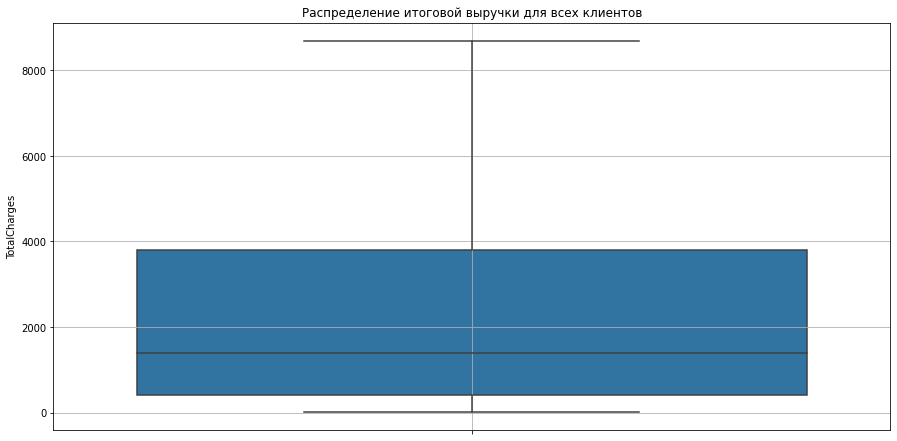

In [ ]:
boxplot('TotalCharges')

Видим следующее: 

* Средняя итоговая выручка составляет 2283 у.е.;
* Максимальный объем выручки составляет 8684 у.е;
* Минимальный объем выручки составляет 18 у.е.
* Медианное значение составляет 1397.5 у.е.

Однако, несмотря на то, что у нас данные представлены практически разного порядка, у нас нет аномальных или выбивающихся значений.

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

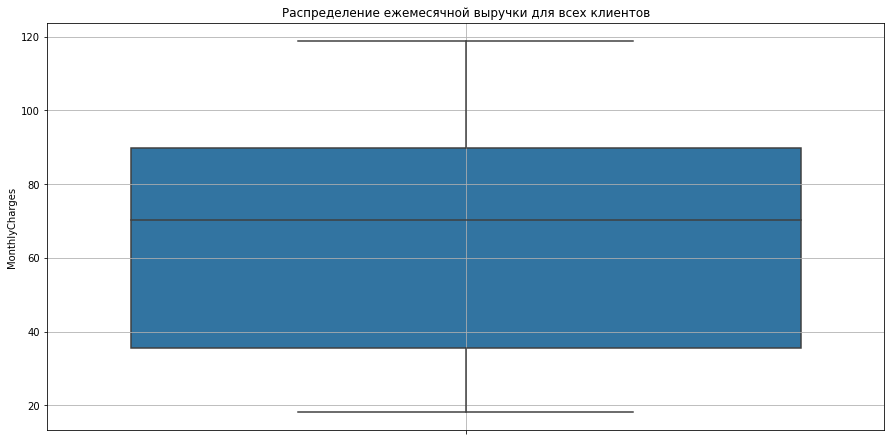

In [ ]:
boxplot('MonthlyCharges')

Здесь мы видим следующее:

* В среднем клиенты тратят 64.8 у.е. в месяц;
* Максимальная ежемесячная выплата составляет 118.75 у.е. в месяц;
* Медианная ежемесячная выплата составляет 70.35 у.е. в месяц;
* Минимальная ежемесячная плата за услуги составляет 18.25 у.е.

Здесь мы видим более симметричную картину, по сравнению с итоговой суммой всех выплат. Это связана с тем, что некоторые клиенты телеком компании могли пользовать долго ее услугами (несколько) при этом используя дополнительные опции, что в свою очередь, может повлиять на ежемесячную плату.

Теперь посмотрим на распределение количественных признаков в зависимости от статуса клиента:

* Клиент ушел;
* Клиент активен.

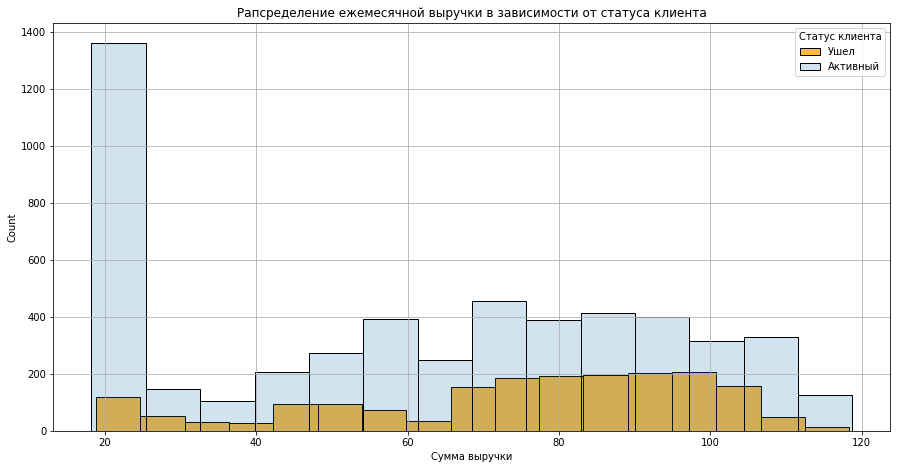

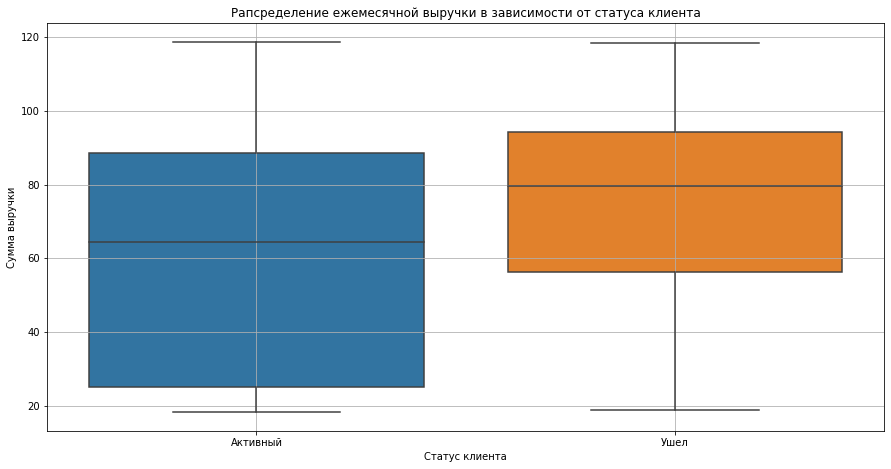

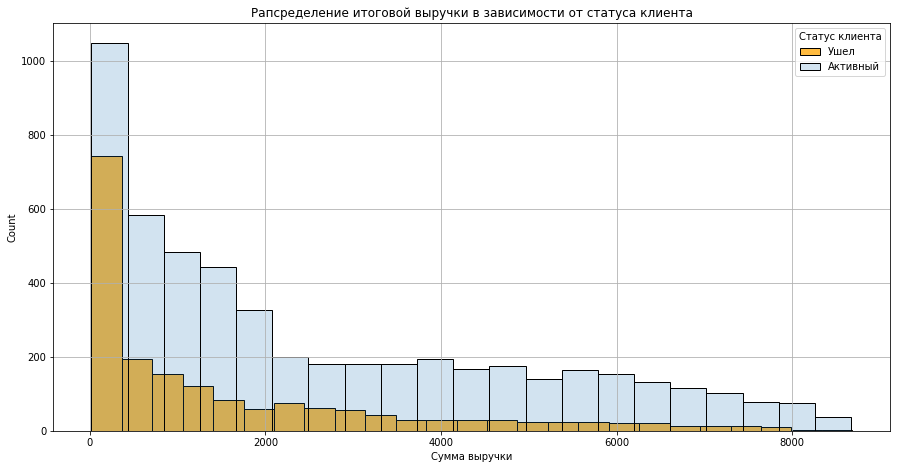

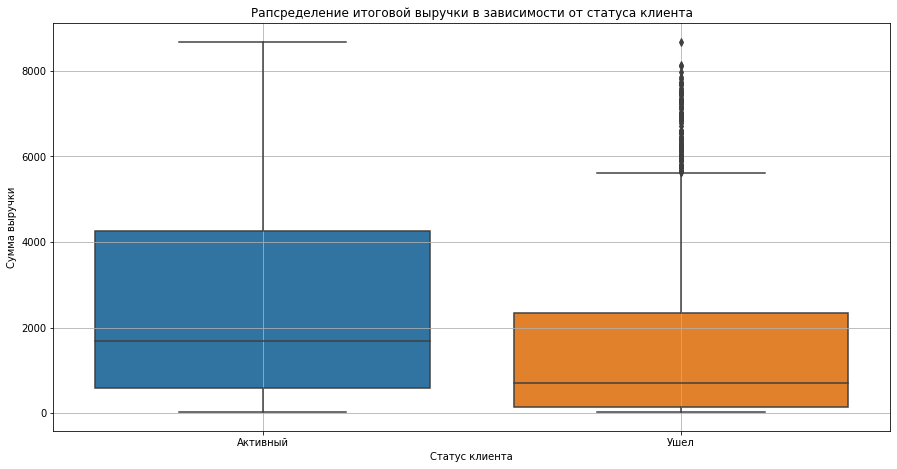

Числовые харакетристики пользователей, которые ушли:


,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000
mean,74.441332,1531.796094
std,24.666053,1890.822994
min,18.850000,18.850000
25%,56.150000,134.500000
50%,79.650000,703.550000
75%,94.200000,2331.300000
max,118.350000,8684.800000


Числовые харакетристики пользователей, которые остались:


,MonthlyCharges,TotalCharges
count,5163.000000,5163.000000
mean,61.307408,2555.344141
std,31.094557,2329.456984
min,18.250000,18.800000
25%,25.100000,577.825000
50%,64.450000,1683.600000
75%,88.475000,4264.125000
max,118.750000,8672.450000


In [ ]:
lst_type = ['Monthly', 'Total']
for types in lst_type:
    sns.histplot(final_df[final_df['Exited'] == 1][types+'Charges'], color='orange')
    sns.histplot(final_df[final_df['Exited'] == 0][types+'Charges'], alpha = 0.20)
    plt.legend(labels=['Ушел', 'Активный'], title = 'Статус клиента')
    if types == 'Monthly':
        name = 'ежемесячной'
    else:
        name = 'итоговой'

    plt.title('Рапсределение ' + name + ' выручки в зависимости от статуса клиента')
    plt.grid('true')
    plt.xlabel('Сумма выручки')
    plt.show();

    sns.boxplot(x = 'Exited', y = types+'Charges', data = final_df)
    plt.title('Рапсределение ' + name + ' выручки в зависимости от статуса клиента')
    plt.xticks([0,1], ['Активный', 'Ушел'])
    plt.grid('true')
    plt.xlabel('Статус клиента')
    plt.ylabel('Сумма выручки')
    plt.show();
    

df_exited = pd.concat([final_df[final_df['Exited'] == 1]['MonthlyCharges'], 
                       final_df[final_df['Exited'] == 1]['TotalCharges']], axis = 1)
print('Числовые харакетристики пользователей, которые ушли:')
display(df_exited.describe())

df_not_exited = pd.concat([final_df[final_df['Exited'] == 0]['MonthlyCharges'], 
                       final_df[final_df['Exited'] == 0]['TotalCharges']], axis = 1)
print('Числовые харакетристики пользователей, которые остались:')
display(df_not_exited.describe())

А теперь сравним полученные результаты:

**Итоговые выплаты**

* По гистограмме распределения итоговой выручки видим, что распределения между клиентами, которые ушли и которые остались идентичное, однако рапсределения имеют разный масштаб, так как клиентов, которые ушли, меньше чем тех, кто остался;
* Большинство пользователей, независимо от класса клиента, потратили за все время пользования услугами телеком-оператора менее 1000 у.е.
* По диаграмме размаха по итоговой выручке видим, что средняя итоговая выручка, пользователей, которые ушли, меньше, чем у оставшихся клиентов. При этом имеются выбивающиеся значения (аномалии) после 5500 у.е. 
* По итоговой выручке, медианное значение итоговых выплат у пользователей, которые остались больше, чем у тех, кто ушел. Однако среди клиентов, которые ушли, есть клиенты, чьи максимальные итоговые выплаты больше, чем у тех, кто по-прежнему пользуется услугами.
* По числовым характеристикам видим:
    * Для клиентов, которые ушли:
        * Средняя выручка: 1531 у.е.;
        * Медианная выручка: 703.5 у.е.;
        * Минимальная выручка: 18.85 у.е.;
        * Максимальная выручка: 8684 у.е.;
    * Для клиентов, которые остались:
        * Средняя выручка: 2555 у.е.;
        * Медианная выручка: 1683.6 у.е.;
        * Минимальная выручка: 18.80 у.е.;
        * Максимальная выручка: 8672 у.е.;       


**Ежемесячные выплаты**

* По гистограмме распределений видим, что распределение клиентов, которые ушли и остались значительно отличаются. Клиенты, которые ушли, тратят в большинстве менее 30 у.е., в то время как ушедшие клиенты тратили в основном в районе 70 у.е.;
* По диаграмме размаха видим, что ежемесячная выручка от разных категорий пользователей отличается. Интерквартильный размах клиентов, которые остались больше. чем у ушедших клиентов, однако медианное значение ушедших клиентов больше, кто по-прежнему пользуется услугами.
* На основе числовых характеристик видим:
    * Для клиентов, которые ушли:
        * Средняя ежемесячная выплата: 74 у.е.;
        * Медианная выплата: 80 у.е.;
        * Минимальная выплата: 18.85 у.е.;
        * Максимальная выплата: 118.35 у.е.;
    * Для клиентов, которые остались:
        * Средняя выплата: 61.3 у.е.;
        * Медианная выплата: 64.45 у.е;
        * Минимальная выплата: 18.25 у.е.;
        * Максимальная выплата: 118.75 у.е.
        
Отсюда следует, что клиенты, которые ушли, в среднем тратитли в месяц больше, чем клиенты, которые остались. При этом, итоговой выручки оставили меньше тех, кто остался.

Теперь посмотрим, в какие годы и месяцы клиенты заключали договоры больше всего, а в какие клиенты уходили. 

**Исследование клиентов по годам и месяцам**

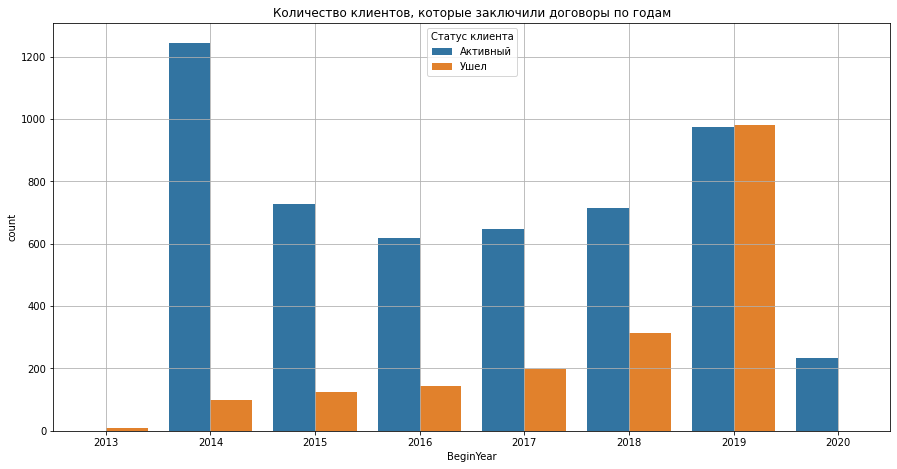

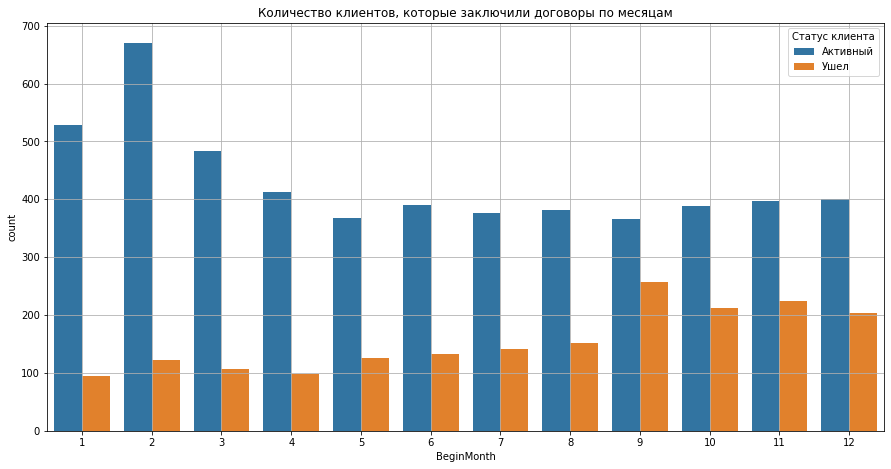

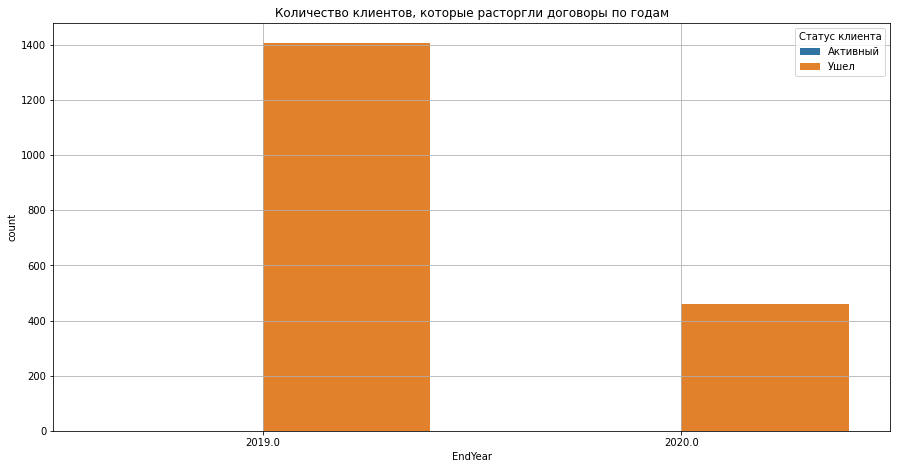

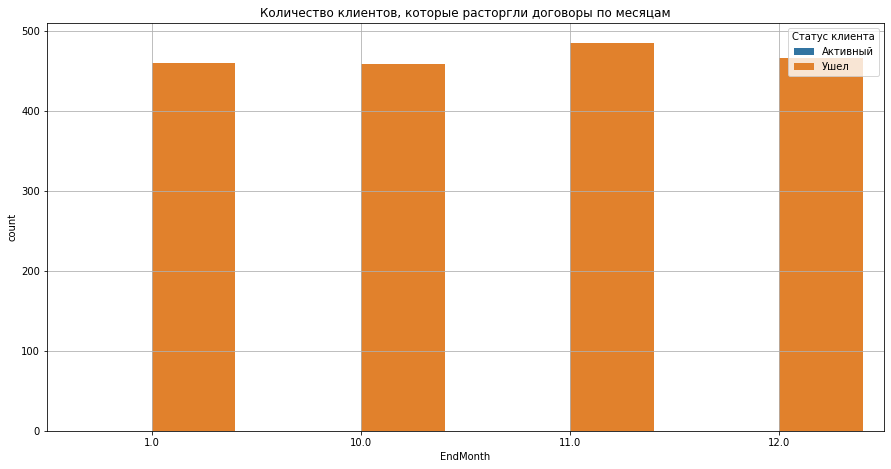

In [ ]:
dct_dates = {'BeginYear': 'заключили договоры по годам',
             'BeginMonth': 'заключили договоры по месяцам',
             'EndYear': 'расторгли договоры по годам',
             'EndMonth': 'расторгли договоры по месяцам'}
for key,value in  dct_dates.items():
    sns.countplot(data=final_df, x = key, hue = 'Exited')
    plt.grid('True')
    plt.title('Количество клиентов, которые '+value)
    plt.legend(labels=['Активный', 'Ушел'], title = 'Статус клиента')
    plt.show();

Вот здесь мы видим следующее:

* Этап: заключение договора:

    * Клиенты, которые остались, чаще всего заключали договоры в 2014 и 2019 годах;
    * Самый популярный месяц для заключения договора среди оставшихся клиентов: февраль и январь;
    * Клиенты, которые ушли, чаще всего заключали договоры в 2019 году;
    * Самый популярный месяц: сентябрь
    
* Этап: расторжение договора:

    * Чаще всего, клиенты расторгали договор в 2019 году;
    * Самый популярный месяц для расторжения договора: ноябрь;
    
Получается следующее: чаще всего, из числа клиентов, которые ушли, заключали договор в сентября 2019 года, а в ноябре 2019 года этот договор расторгали. Получается, что в этот интервал времени была какая-то временная акция от телеком-компании, которая привлекла к себе большое количество пользователей. Но из-за того, что эта акция закончилась, пользователи покинули ее. Возможно, измениоась стоимость услуг, судя по тому, что средний ежемесячный чек у тех, кто ушел выше, по сравнению с оставшимся. Возможно, большинство оставшихся клиентов пользуются архивными тарифами, стоимость которых была меньше, по сравнению на 2019 год.



**Исследование категориальных признаков** <a id="5_2"></a>

Теперь посмотрим на категориальные признаки с целью определить, какими услугами пользовались разные категории людей (ушел/активный).

Вспомним, как услуги предлагает телеком-оператор:

* `MultipleLines`;
* `OnlineSecurity`;
* `OnlineBackup`;
* `DeviceProtection`;
* `TechSupport`;
* `StreamingTV`;
* `StreamingMovies`.

Теперь посмотрим столбчатые диаграммы для определения портрета пользователя: какими услугами пользовались чаще всего, какие группы клиентов выделяются по услугам

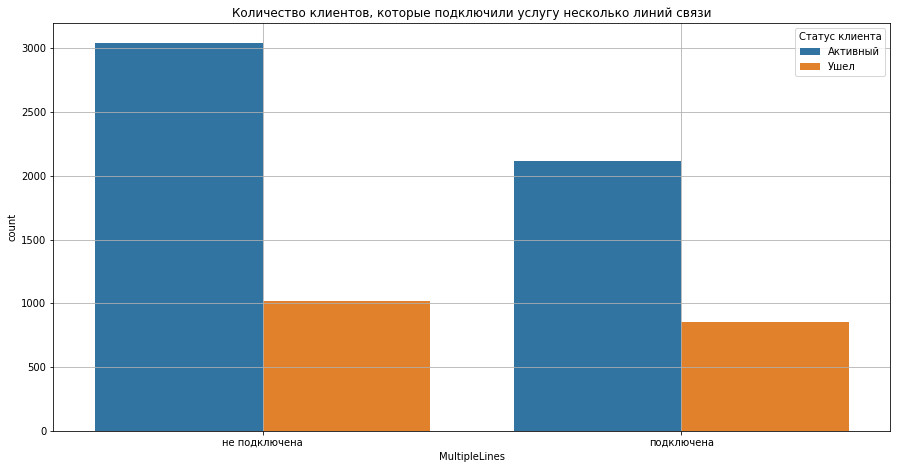

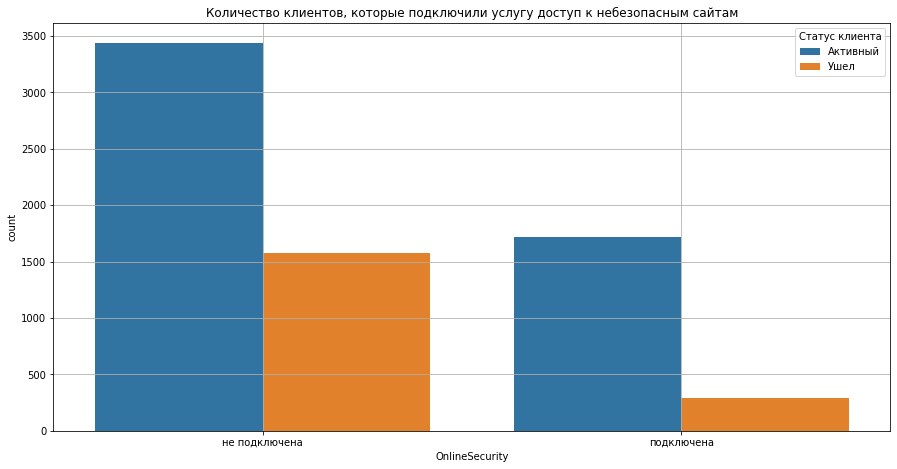

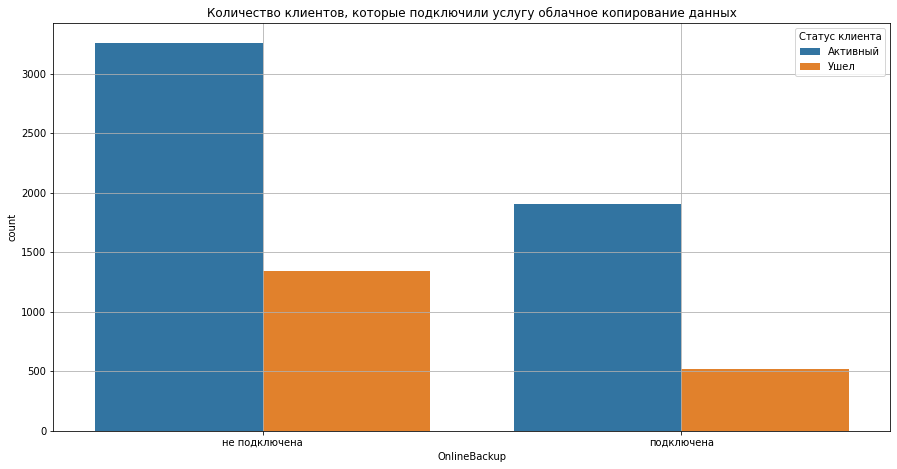

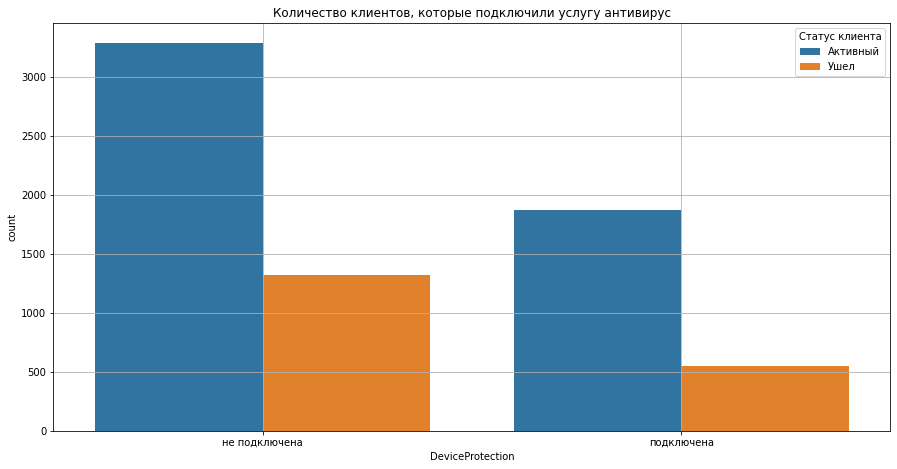

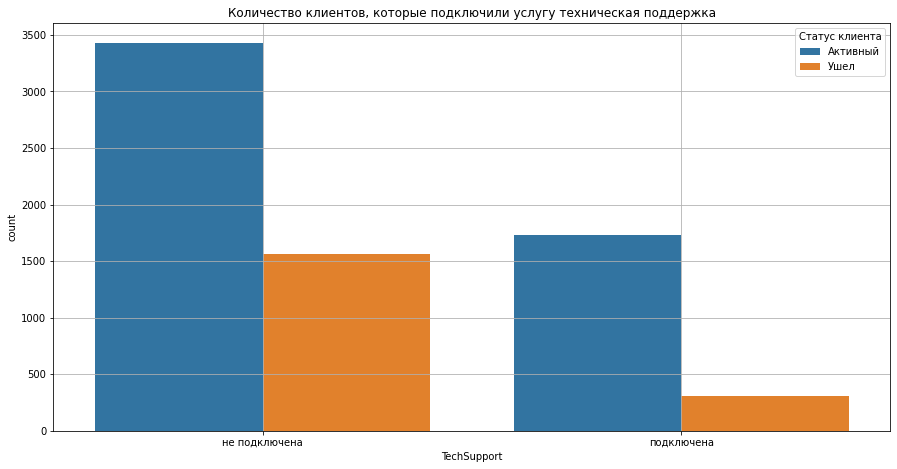

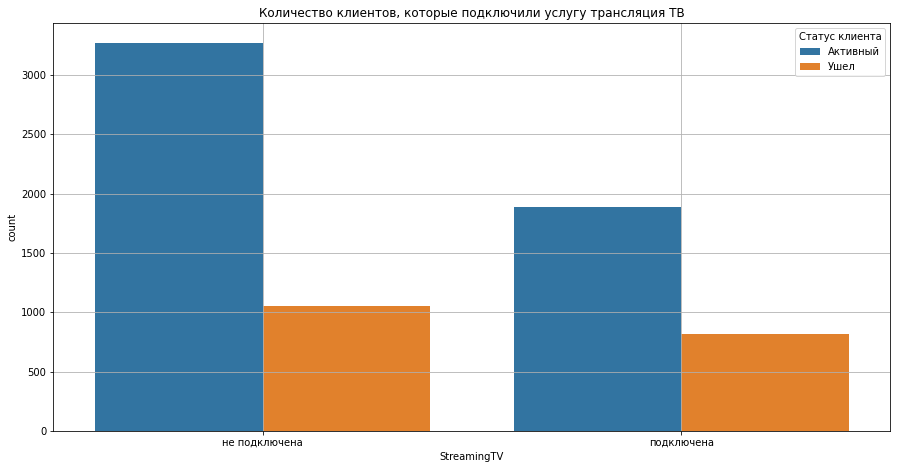

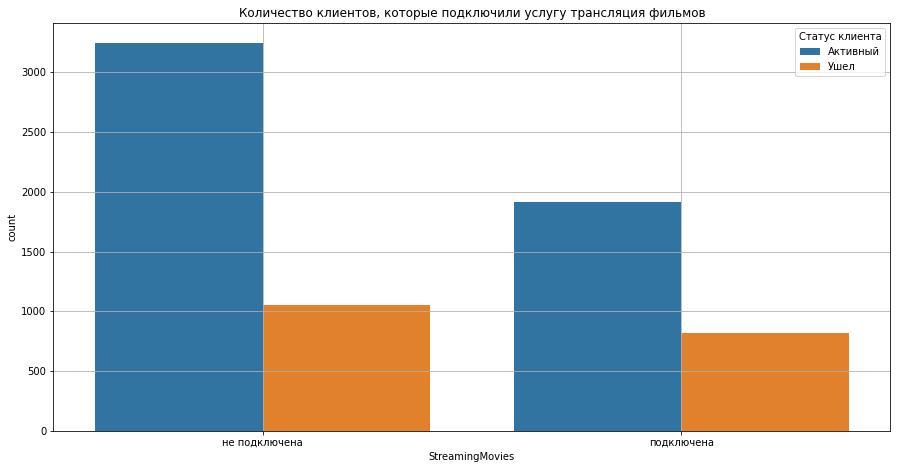

In [ ]:
dct_dates = {'MultipleLines': 'несколько линий связи',
             'OnlineSecurity': 'доступ к небезопасным сайтам',
             'OnlineBackup': 'облачное копирование данных',
             'DeviceProtection': 'антивирус',
             'TechSupport': 'техническая поддержка',
             'StreamingTV': 'трансляция ТВ',
             'StreamingMovies': 'трансляция фильмов'}
for key,value in  dct_dates.items():
    sns.countplot(data=final_df, x = key, hue = 'Exited')
    plt.grid('True')
    plt.title('Количество клиентов, которые подключили услугу '+value)
    plt.legend(labels=['Активный', 'Ушел'], title = 'Статус клиента')
    plt.xticks([0,1],['не подключена', 'подключена'])
    plt.show();

На основе полученных результатов по предлагаемым услугам можно заметить следующее:
* Клиенты, которые ушли в чаще всего пользовались следующими услугами:
    * подключение к нескольким линиям связи;
    * трансляция ТВ;
    * трансялция фильмов;
* Самые непопулярные услуги среди клиентов, которые ушли:
    * техническая поддеркжа;
    * защита от небезопасных сайтов;
* Независимо от группы клиентов, люди не готовы доплачивать за дополнительные услуги: количество клиентов, которые не подключали дополнительные услуги телефона и интернета больше.
* Постоянные клиенты чаще всего пользуются следующими услугами:
    * подключение к нескольким линиям связи;
    * трансялция ТВ;
    * трансляция фильмов;
    * облачное копирование данных;
* Наименнее популярные услуги у постоянных клиентов:
    * техническая поддеркжа;
    * защита от небезопасных сайтов;

На основе полученных наблюдений можно сделать сделать следующие выводы:

* Люди предпочитают не платить за доплнительные услуги;
* Самые непопулярные услуги:
    * техническая поддеркжа;
    * защита от небезопасных сайтов;
* Самые популярные услуги:
    * подключение к нескольким линиям связи;
    * трансляция ТВ;
    * трансялция фильмов;  

**Тип интернет-соединения**

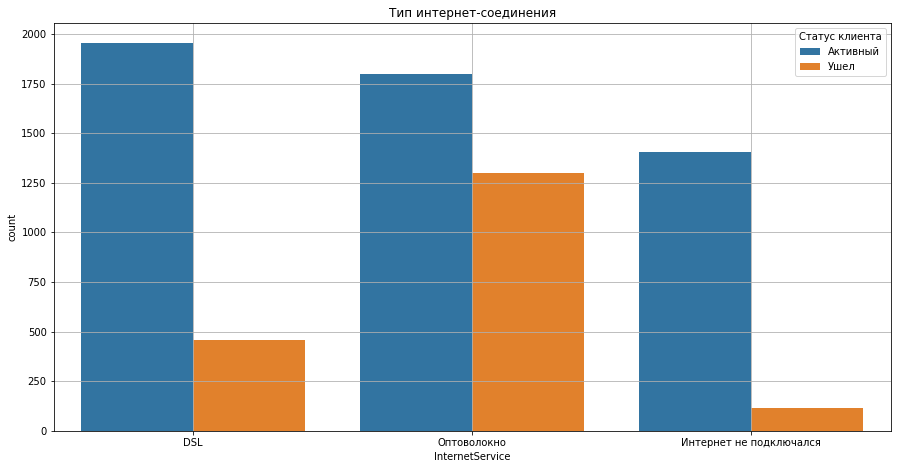

In [ ]:
sns.countplot(data=final_df, x = 'InternetService', hue = 'Exited')
plt.title('Тип интернет-соединения')
plt.grid('true')
plt.legend(labels=['Активный', 'Ушел'], title = 'Статус клиента')
plt.xticks([0,1,2],['DSL', 'Оптоволокно', 'Интернет не подключался']);

В результате, получили:

* Самый популярный тип интернет-соединения среди клиентов, которые расторгли договор - оптоволкно;
* Клиенты независимо от статуса предпочитают подключать интернет, чем быть без него.

Теперь посмотрим, каким типом договора чаще пользовались клиенты.

**Тип договора**

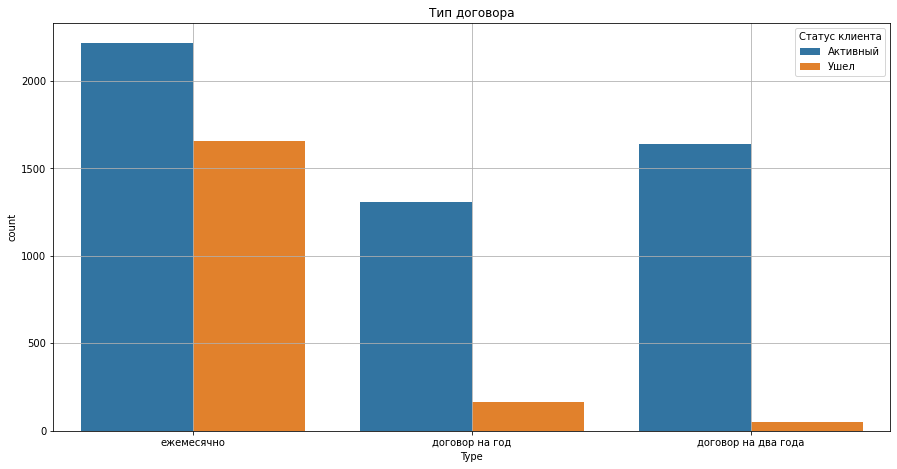

In [ ]:
sns.countplot(data=final_df, x = 'Type', hue = 'Exited')
plt.title('Тип договора')
plt.grid('true')
plt.legend(labels=['Активный', 'Ушел'], title = 'Статус клиента')
plt.xticks([0,1,2],['ежемесячно', 'договор на год', 'договор на два года']);

Здесь мы видим следующее:
* Чаще всего клиенты предопчитают пользоваться договором категории 'ежемесячно';
* Клиенты, которые ушли, чаще всего предпочитали договоры категории 'ежемесячно';
* Клиенты, которые остались, предпочитают договоры категорий: 'ежемесячно' и 'на два года' .

Теперь посмотрим, как разные группы пользователей (пожилые, иждивенцы, наличие супруги) влияют на то, ушел клиент или нет:

**Семейный статус клиента**

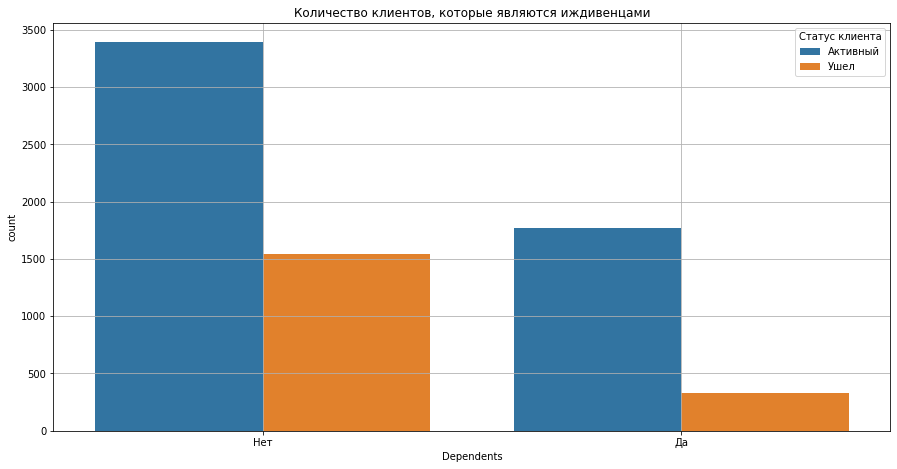

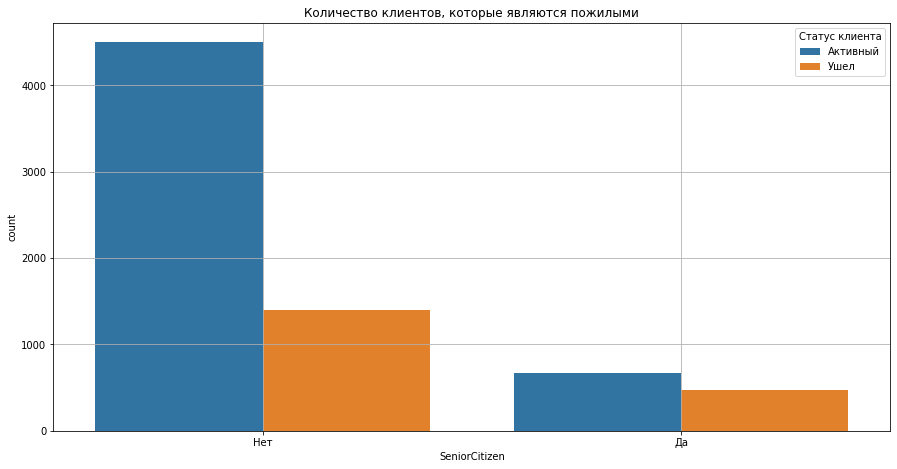

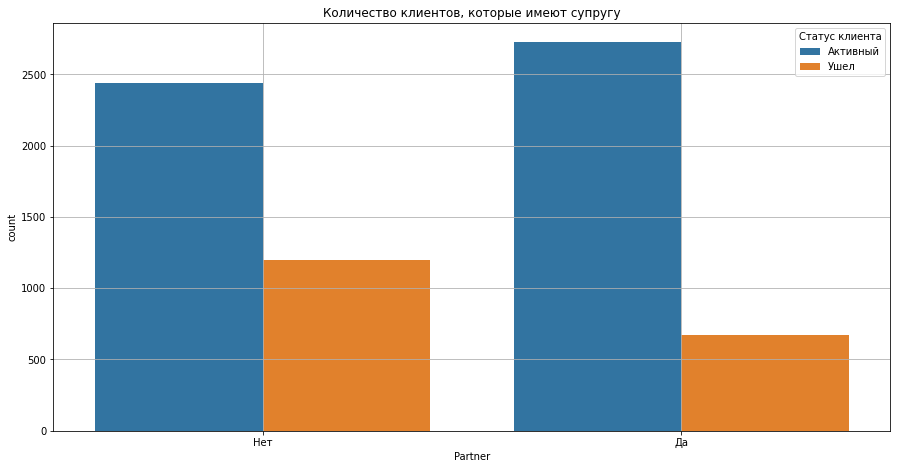

In [ ]:
dct_dates = {'Dependents': 'являются иждивенцами',
             'SeniorCitizen': 'являются пожилыми',
             'Partner': 'имеют супругу'}
for key,value in  dct_dates.items():
    sns.countplot(data=final_df, x = key, hue = 'Exited')
    plt.grid('True')
    plt.title('Количество клиентов, которые '+value)
    plt.legend(labels=['Активный', 'Ушел'], title = 'Статус клиента')
    plt.xticks([0,1],['Нет', 'Да'])
    plt.show();

В результате получили следующее:

* Независимо от категории клиентов, болшинство клиентов имеют супругу;
* Самая популярная группа клиентов - люди молодые и среднего ворзраста;
* Наименее популярная группа клиентов - пожилые люди.

**Количество дней действия договора**

После того, как провели исследовательский анализ данных, сформируем дополнительный признак: количество дней с момента договора.

Однако у нас есть клиенты, которые не закрывали договор, поэтому в признаке `EndDate` у нас имеются пропуски.

Для этого сделаем следующее:

* Заполним пропуски актуальной датой выгрузки данных - 1 февраля 2020 в формате 2020-02-01;
* Посчитаем количество дней для каждого клиента независимо от статуса.

In [ ]:
final_df.loc[final_df.EndDate.isna(), 'EndDate'] = pd.to_datetime('2020-02-01')

Проверим полученные результаты:

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int8          
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   Exited            7032 non-null   int8          
 9   gender            7032 non-null   object        
 10  SeniorCitizen     7032 non-null   int64         
 11  Partner           7032 non-null   int8          
 12  Dependents        7032 non-null   int8          
 13  MultipleLines     7032 non-null   int8          
 14  InternetService   7032 n

In [ ]:
final_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited,gender,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,BeginYear,BeginMonth,EndYear,EndMonth
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,0,0,0,0,2020,1,NaN,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,0,Mailed check,56.95,1889.50,0,Male,...,1,0,1,0,0,0,2017,4,NaN,NaN
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,1,1,0,0,0,0,2019,10,2019.0,12.0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,1,1,0,0,2016,5,NaN,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,0,0,0,0,2019,9,2019.0,11.0


Пропуски в нужно признаке заполнили, теперь сформируем новый признак - количество дней с момента заключения договора до момента выгрузки данных.

In [ ]:
final_df['Days'] = (final_df.EndDate - final_df.BeginDate).dt.days.astype('int32')

Посмотрим на результат:

In [ ]:
final_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited,gender,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,BeginYear,BeginMonth,EndYear,EndMonth,Days
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,0,0,0,2020,1,NaN,NaN,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,0,Mailed check,56.95,1889.50,0,Male,...,0,1,0,0,0,2017,4,NaN,NaN,1036
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,1,0,0,0,0,2019,10,2019.0,12.0,61
3,7795-CFOCW,2016-05-01,2020-02-01,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,1,1,0,0,2016,5,NaN,NaN,1371
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,0,0,0,2019,9,2019.0,11.0,61


Теперь посмотрим на то, как распределены дни действия договоров в зависимости от класса клиента.

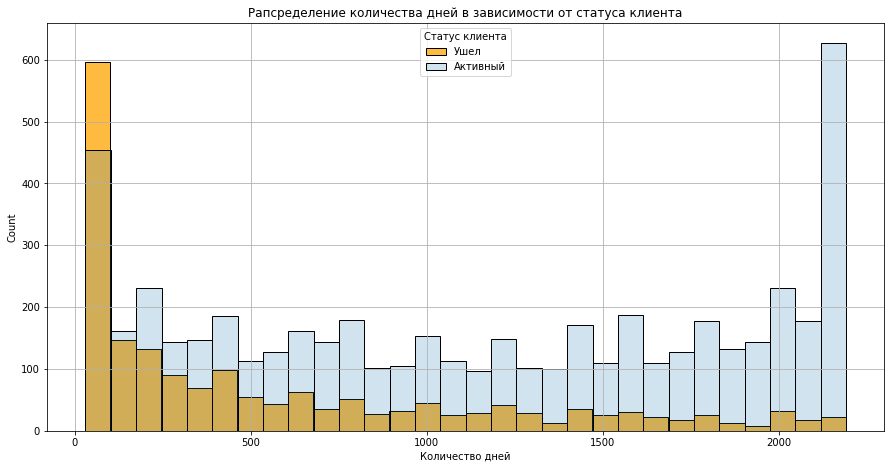

In [ ]:
sns.histplot(final_df[final_df['Exited'] == 1]['Days'], color='orange', bins = 30)
sns.histplot(final_df[final_df['Exited'] == 0]['Days'], alpha = 0.20, bins = 30)
plt.legend(labels=['Ушел', 'Активный'], title = 'Статус клиента')
plt.title('Рапсределение количества дней в зависимости от статуса клиента')
plt.grid('true')
plt.xlabel('Количество дней')
plt.show();

Вот здесь мы видим следующее:

* Клиенты, которые ушли, пользовались услугами компании менее 50 дней.
* У клиентов, которые остались, время действия договора на момент выгрузки данных составляет менее 50 дней и более 2000 дней. Первое связанное с тем, что это новые клиенты, которые месяц назад до выгрузки данных, заключили договоры. А второе - это клиенты, которые больше 6 лет пользуются услугами телеком-компании.

**Проверка статистических гипотез** <a id="5_3"></a>

Для исследовательской части проекта проверим несколько гипотез:

1. Средняя ежемесячная выплата между разными категориями равны;
2. Среднее время действия договора между клиентами равны.

Для этого сформируем необходимые выборки, а также проверим, отичаются ли у этих выборок дисперсии

**Средняя ежемесячная выплата между разными категориями равны**

In [ ]:
mc_exited = final_df[final_df.Exited == 1]['MonthlyCharges']
mc_not_exited = final_df[final_df.Exited == 0]['MonthlyCharges']
print('Дисперсия по признаку для клиентов которые ушли:')
display(mc_exited.var())
print('Дисперсия по признаку для клиентов которые не ушли:')
display(mc_not_exited.var())

Дисперсия по признаку для клиентов которые ушли:


608.4141833954307

Дисперсия по признаку для клиентов которые не ушли:


966.8714692222991

Видим, что дисперсии между выборками отличаются. Это мы учтем при проведении T-теста.

Сформируем нулевую и альтернативные гипотезы:

* **Нулевая гипотеза**: средняя ежемесячная выплата между группами клиентов одинакова;
* **Альтернативная гипотеза**: средняя ежемесячная выплата между группами отличаются.

In [ ]:
def hypotesis_check(s1 : pd.Series, s2 : pd.Series):
    alpha = .05
    results = (
        st.ttest_ind(s1, s2, equal_var=False)
    )

    print('p-value:', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не удалось отвергнуть нулевую гипотезу')

In [ ]:
hypotesis_check(mc_exited, mc_not_exited)

p-value: 2.657357144516026e-72
Отвергаем нулевую гипотезу


Здесь мы получили следующий результат: вероятность того, что разница между средними ежемесячными выручками между разными группами клиентов случайна - крайне мала. Отсюда можно сказать, что средняя ежемесячная выплата между группами клиентов разная.

**Среднее время действия договора между группами клиентов одинаково**

In [ ]:
days_exited = final_df[final_df.Exited == 1]['Days']
days_not_exited = final_df[final_df.Exited == 0]['Days']
print('Дисперсия по признаку для клиентов которые ушли:')
display(days_exited.var())
print('Дисперсия по признаку для клиентов которые не ушли:')
display(days_not_exited.var())


Дисперсия по признаку для клиентов которые ушли:


353299.0044671141

Дисперсия по признаку для клиентов которые не ушли:


536956.9405945789

Видим, что дисперсии между выборками отличаются.

Сформируем нулевую и альтернативную гипотезы:

* **Нулевая гипотеза**: среднее количество дней между группами клиентов одинаково;
* **Альтернативная гипотеза**: среднее количество дней между группами клиентов отличаются;

In [ ]:
hypotesis_check(days_exited, days_not_exited)

p-value: 5.881089741944088e-235
Отвергаем нулевую гипотезу


Здесь мы получили следующий результат: вероятность того, что разница между средними количеством дней действия договора между группами клиентов случайна - крайне мала. Отсюда можно сказать, что среднее количество дней действия договора между группами клиентов разная.

### Общий вывод

В процессе иссследования данных мы рассмотрели следующий вопрос: как отличаются клиенты, которые ушли, и клиенты, которые по-прежнему пользуются услугами телеком-компании.

В процессе исследования мы рассмотрели следующие признаки:
* итоговой выручки;
* ежемесячной выручки;
* год начала договора;
* месяц начала договора;
* год расторжения договора;
* месяц расторжения договора;
* услуги, предоставляемые компанией;
* тип интернет-соединений;
* тип договора;
* семейный статус клиента;
* дней действия договора.

В результате получили следующие выводы:

* Этап: заключение договора:
    * Клиенты, которые остались, чаще всего заключали договоры в 2014 и 2019 годах;
    * Самый популярный месяц для заключения договора среди оставшихся клиентов: февраль и январь;
    * Клиенты, которые ушли, чаще всего заключали договоры в 2019 году;
    * Самый популярный месяц: сентябрь
    
* Этап: расторжение договора:
    * Чаще всего, клиенты расторгали договор в 2019 году;
    * Самый популярный месяц для расторжения договора: ноябрь;

* Итоговая выручка:
    * Для клиентов, которые ушли:
        * Средняя выручка: 1531 у.е.;
        * Медианная выручка: 703.5 у.е.;
        * Минимальная выручка: 18.85 у.е.;
        * Максимальная выручка: 8684 у.е.;
    * Для клиентов, которые остались:
        * Средняя выручка: 2555 у.е.;
        * Медианная выручка: 1683.6 у.е.;
        * Минимальная выручка: 18.80 у.е.;
        * Максимальная выручка: 8672 у.е.;  

* Ежемесячная выручка: 

    * Для клиентов, которые ушли:
        * Средняя ежемесячная выплата: 74 у.е.;
        * Медианная выплата: 80 у.е.;
        * Минимальная выплата: 18.85 у.е.;
        * Максимальная выплата: 118.35 у.е.;
    * Для клиентов, которые остались:
        * Средняя выплата: 61.3 у.е.;
        * Медианная выплата: 64.45 у.е;
        * Минимальная выплата: 18.25 у.е.;
        * Максимальная выплата: 118.75 у.е.

* Услуги компании:
    * Люди предпочитают не платить за доплнительные услуги;
    * Самые непопулярные услуги:
        * техническая поддеркжа;
        * защита от небезопасных сайтов;
    * Самые популярные услуги:
        * подключение к нескольким линиям связи;
        * трансляция ТВ;
        * трансялция фильмов; 

* Тип интернет-соединения:
    * Самый популярный тип интернет-соединения среди клиентов, которые расторгли договор - оптоволкно;
    * Клиенты независимо от статуса предпочитают подключать интернет, чем быть без него.

* Тип договора:
    * Чаще всего клиенты предопчитают пользоваться договором категории 'ежемесячно';
    * Клиенты, которые ушли, чаще всего предпочитали договоры категории 'ежемесячно';
    * Клиенты, которые остались, предпочитают договоры категорий: 'ежемесячно' и 'на два года'.

* Семейный статус:
    * Независимо от категории клиентов, болшинство клиентов имеют супругу;
    * Самая популярная группа клиентов - люди молодые и среднего ворзраста;
    * Наименее популярная группа клиентов - пожилые люди.

* Дней действия договора: 
    * Клиенты, которые ушли, пользовались услугами компании менее 50 дней.
    * У клиентов, которые остались, время действия договора на момент выгрузки данных составляет менее 50 дней и более 2000 дней.

В процессе исследования проверили следующие гипотезы:

* Средняя ежемесячная выручка между клиентами разных групп одинакова;
* Среднее количество дней с момента действия договора одинаково;

В результате проверки получили следущие результаты: 

* Средняя ежемесячная выручка между клиентами разных групп разная;
* Среднее количество дней с момента действия договора разное;

Таким образом, мы получили портрет клиента, который перестал пользоваться услугами:

* В среднем ежемесячно платил больше, чем постоянные клиенты;
* Популярные услуги:
    * подключение к нескольким линиям связи;
    * трансляция ТВ;
    * трансялция фильмов; 
* Самый популярный год подключения: 2019 год;
* Самый популярный месяц подключения: сентябрь;
* Самый популярный год расторжения: 2019 год;
* Самый популярный год расторжения: ноябрь.



После того, как провели исследовательский анализ данных, проведем подготовку данных к машинному обучению

### Обучение моделей <a id="6"></a>

**Подготовка к машинному обучению** <a id="6_1"></a>

Прежде чем начнем подготовку данных к обучению моделей, уточним следующие детали:

* Проверка на дисбаланс классов;
* Удаление признаков, которые не подойдут для обучения
* Кодирование признаков;
* Генерация выборок: обучающая и тестовая;
* Выбор метрики и моделей.

**Проверка на дисбаланс классов**

Для начала проверим целевую метрику на наличие дисбаланса классов:

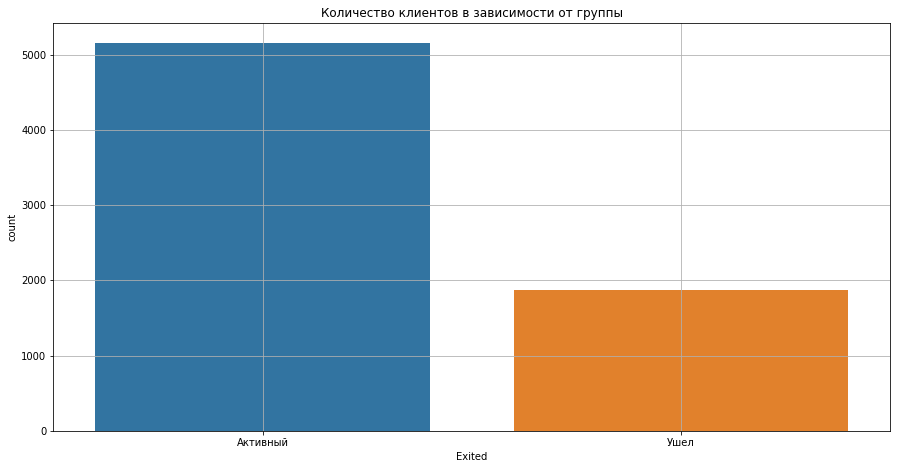

Доля объектов классов от общего количества обхектов:


0    0.734215
1    0.265785
Name: Exited, dtype: float64

In [ ]:
sns.countplot(data = final_df, x = 'Exited')
plt.title('Количество клиентов в зависимости от группы')
plt.grid('true')
plt.xticks([0,1], ['Активный', 'Ушел'])
plt.show();
print('Доля объектов классов от общего количества обхектов:')
final_df.Exited.value_counts(normalize=True)

Здесь мы видим сильный дисбаланс классов. Это необходимо учесть при реализации моделей.

Возможные варианты:

* Использование параметра `class_weight`;
* Upsampling;
* Downsampling;
* Threshold variating.

В нашем случае воспользуемся параметром `class_weight`. Это наиболее простой в реализации вариант, который обеспечит нужный баланс.

**Удаление лишних признаков**

Посмотрим на нашу итоговую таблицу:

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int8          
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   Exited            7032 non-null   int8          
 9   gender            7032 non-null   object        
 10  SeniorCitizen     7032 non-null   int64         
 11  Partner           7032 non-null   int8          
 12  Dependents        7032 non-null   int8          
 13  MultipleLines     7032 non-null   int8          
 14  InternetService   7032 n

Видим, что есть признаки, которые нам не нужны для обучения:

* `BeginDate`;
* `EndDate`;
* `customerID`;
* `BeginYear`;
* `BeginMonth`;
* `EndYear`;
* `EndMonth`.

Избавимся от них:

In [ ]:
delete_lst = ['BeginDate',
              'EndDate',
              'customerID',
              'BeginYear',
              'BeginMonth',
              'EndYear',
              'EndMonth']
for col in delete_lst:
    final_df = final_df.drop(col, axis = 1)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7032 non-null   object 
 1   PaperlessBilling  7032 non-null   int8   
 2   PaymentMethod     7032 non-null   object 
 3   MonthlyCharges    7032 non-null   float64
 4   TotalCharges      7032 non-null   float64
 5   Exited            7032 non-null   int8   
 6   gender            7032 non-null   object 
 7   SeniorCitizen     7032 non-null   int64  
 8   Partner           7032 non-null   int8   
 9   Dependents        7032 non-null   int8   
 10  MultipleLines     7032 non-null   int8   
 11  InternetService   7032 non-null   object 
 12  OnlineSecurity    7032 non-null   int8   
 13  OnlineBackup      7032 non-null   int8   
 14  DeviceProtection  7032 non-null   int8   
 15  TechSupport       7032 non-null   int8   
 16  StreamingTV       7032 non-null   int8   


In [ ]:
final_df.head(3)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Days
0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,0,DSL,0,1,0,0,0,0,31
1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,0,DSL,1,0,1,0,0,0,1036
2,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,0,DSL,1,1,0,0,0,0,61


Лишние признаки удалены, теперь приступим к кодированию признаков.

**Кодирование признаков**

Теперь проведем кодирование признаков. Для этого можно рассмотреть следующие варианты:

* OHE;
* Label encoding
* С помощью метода map(), так как уникальных значений в каждом признаке не так много.

В данном случае предлагается применить технику OHE. Так как уникальных значений признаков не так много и мы тем самым не усложним процесс обучения моделей.

In [ ]:
final_df = pd.get_dummies(final_df, drop_first=True)

Посмотрим на результат:

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PaperlessBilling                       7032 non-null   int8   
 1   MonthlyCharges                         7032 non-null   float64
 2   TotalCharges                           7032 non-null   float64
 3   Exited                                 7032 non-null   int8   
 4   SeniorCitizen                          7032 non-null   int64  
 5   Partner                                7032 non-null   int8   
 6   Dependents                             7032 non-null   int8   
 7   MultipleLines                          7032 non-null   int8   
 8   OnlineSecurity                         7032 non-null   int8   
 9   OnlineBackup                           7032 non-null   int8   
 10  DeviceProtection                       7032 non-null   int8   
 11  Tech

Для начала посмотрим на количественные признаки:

In [ ]:
final_df[['TotalCharges', 'MonthlyCharges']].head()

,TotalCharges,MonthlyCharges
0,29.85,29.85
1,1889.50,56.95
2,108.15,53.85
3,1840.75,42.30
4,151.65,70.70


Видим, что у нас количественные признаки имеют разную размерность. Для этого необходимо провести масштабирование признаков. А также выделить обучающую и тестовые выборки. Сама реализация будет проходить внутри класса. При этом мы будем проводить тестирование на обучающей выборке и финальное тестирование.

**Первичное обучение моделей** <a id="6_2"></a>

In [ ]:
class models:
    def __init__(self,
                 data:pd.DataFrame,
                 tar_name : str = 'Exited'):
        self.data = data.copy()
        self.feature = self.data.drop(tar_name, axis = 1)
        self.target = self.data[tar_name]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.feature, 
                                                    self.target,
                                                    test_size = .2,
                                                    random_state = 250722,
                                                    stratify=self.target)

        self.test_list_auc = []
        self.test_list_acc = []
        self.train_list_auc = []
        self.train_list_aсc = []
        self.model_index = []

    @staticmethod
    def take_params(model_type: str):
        if 'LogisticRegression' in model_type:
            params = {
                'mod__random_state' : [250722],
                'mod__class_weight' : ['balanced'],
                'mod__C': [1,20,5],
                'mod__solver' : ['liblinear'],
                'mod__max_iter': [500],
                'mod__penalty' : ['l1', 'l2']
            }
        elif 'RandomForest' in model_type:
            params = {
                'mod__random_state' : [250722],
                'mod__n_estimators' : [80, 300, 20],
                'mod__class_weight' : ['balanced'],
                'mod__max_depth' : [1,15,5],    
                'mod__criterion' : ['gini', 'entropy']
            }
        elif 'CatBoost' in model_type:
            params = {
                'mod__random_seed' : [250722],
                'mod__thread_count' : [-1],
                'mod__auto_class_weights' : ['Balanced'],
                'mod__depth' : [10],
                'mod__learning_rate' : [0.4],
                'mod__min_data_in_leaf': [1,2,15],
                'mod__iterations' : [25, 300, 25],
                'mod__logging_level' : ['Silent']
            } 
        elif 'LGBM' in model_type:
            params = {
                'mod__n_estimators': [5, 300, 25],
                'mod__num_leaves': [5,300,25],
                'mod__max_depth' : [5, 50, 5],
                'mod__learning_rate' : [0.4],
                'mod__class_weight': ['balanced'],
                'mod__random_state':[250722],
                'mod__n_jobs' : [3]
            }           
        return params

    @staticmethod
    def pipeline(self, model):
        pipe = Pipeline([('sc', StandardScaler()),
        ('mod', model)])
        return pipe

    @staticmethod
    def feature_importance(self, model):
        model_fi = model
        model_fi.fit(self.X_train, self.y_train)

        try:
            sort = model_fi.feature_importances_.argsort()
            plt.barh(self.X_train.columns[sort], model_fi.feature_importances_[sort])
        except:
            sort = model_fi.coef_[0].argsort()
            plt.barh(self.X_train.columns[sort], model_fi.coef_[0][sort])

        plt.grid('true')
        plt.title('Значимость признаков для модели '+ model.__class__.__name__)
        plt.show();


    @staticmethod
    def grid_search(self, model):
        self.roc_auc = GridSearchCV(self.pipeline(self, model), 
        self.take_params(model.__class__.__name__),
         cv = 5, 
         scoring='roc_auc',
         n_jobs=3,
         verbose = 15)

        self.acc = GridSearchCV(self.pipeline(self, model), 
        self.take_params(model.__class__.__name__),
         cv = 5, 
         scoring='accuracy',
         n_jobs=3,
         verbose = 15)     

        self.roc_auc.fit(self.X_train, self.y_train)
        print(f'The best roc-auc of {model.__class__.__name__} : {self.roc_auc.best_score_:.3f}')

        self.acc.fit(self.X_train, self.y_train)
        print(f'The best accuracy of {model.__class__.__name__} : {self.acc.best_score_:.3f}')

        self.model_index.append(model.__class__.__name__)
        self.train_list_auc.append(self.roc_auc.best_score_)
        self.train_list_aсc.append(self.acc.best_score_)


        return self.roc_auc.best_estimator_, self.acc.best_estimator_

    def take_res(self, model):
        roc_auc, acc = self.grid_search(self, model)
        roc_auc.fit(self.X_train, self.y_train)
        roc_auc_pred = roc_auc.predict_proba(self.X_test)[:, 1]

        acc.fit(self.X_train, self.y_train)
        acc_pred = acc.predict(self.X_test)

        print(f'The final roc_auc-score for test with {model.__class__.__name__}: {roc_auc_score(self.y_test, roc_auc_pred):.3f}')
        print(f'The final accuracy-score for test with {model.__class__.__name__}: {accuracy_score(self.y_test, acc_pred):.3f}')

        self.test_list_auc.append(roc_auc_score(self.y_test, roc_auc_pred))
        self.test_list_acc.append(accuracy_score(self.y_test, acc_pred))

        self.feature_importance(self, model)

        del model

    def report(self):
        df = pd.DataFrame({
            'Train score (ROC-AUC)': self.train_list_auc,
            'Train score (ACCURACY)': self.train_list_aсc,
            'Test score (ROC-AUC)': self.test_list_auc,
            'Test score (ACCURACY)': self.test_list_acc}, index = self.model_index)
        return df

In [ ]:
test = models(final_df)

**Логистическая регрессия**

Fitting 5 folds for each of 6 candidates, totalling 30 fits
The best roc-auc of LogisticRegression : 0.847
Fitting 5 folds for each of 6 candidates, totalling 30 fits
The best accuracy of LogisticRegression : 0.746
The final roc_auc-score for test with LogisticRegression: 0.841
The final accuracy-score for test with LogisticRegression: 0.750


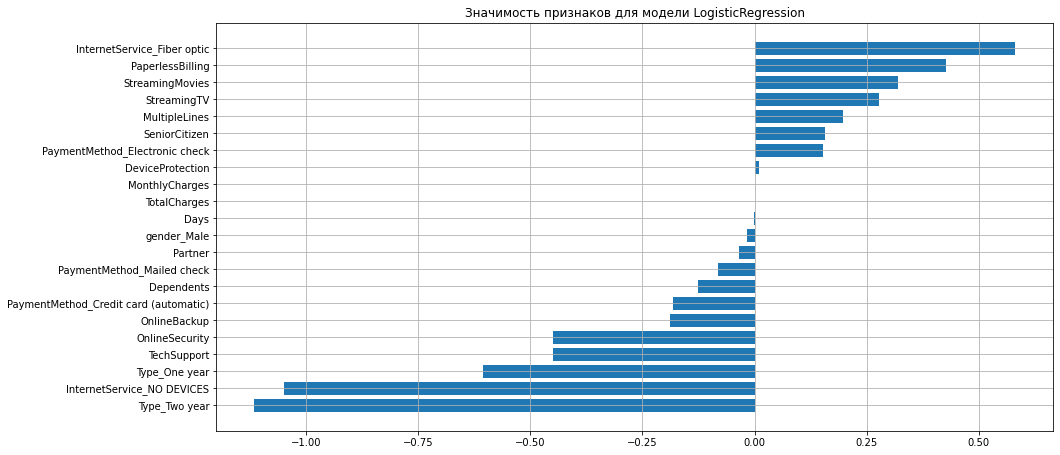

In [ ]:
test.take_res(LogisticRegression())

**Случайный лес**

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 3/5; 1/6] START mod__C=1, mod__class_weight=balanced, mod__max_iter=500, mod__penalty=l1, mod__random_state=250722, mod__solver=liblinear
[CV 3/5; 1/6] END mod__C=1, mod__class_weight=balanced, mod__max_iter=500, mod__penalty=l1, mod__random_state=250722, mod__solver=liblinear; total time=   0.4s
[CV 1/5; 2/6] START mod__C=1, mod__class_weight=balanced, mod__max_iter=500, mod__penalty=l2, mod__random_state=250722, mod__solver=liblinear
[CV 1/5; 2/6] END mod__C=1, mod__class_weight=balanced, mod__max_iter=500, mod__penalty=l2, mod__random_state=250722, mod__solver=liblinear; total time=   0.1s
[CV 3/5; 2/6] START mod__C=1, mod__class_weight=balanced, mod__max_iter=500, mod__penalty=l2, mod__random_state=250722, mod__solver=liblinear
[CV 3/5; 2/6] END mod__C=1, mod__class_weight=balanced, mod__max_iter=500, mod__penalty=l2, mod__random_state=250722, mod__solver=liblinear; total time=   0.1s
[CV 5/5; 2/6] START mod__C=1, mod

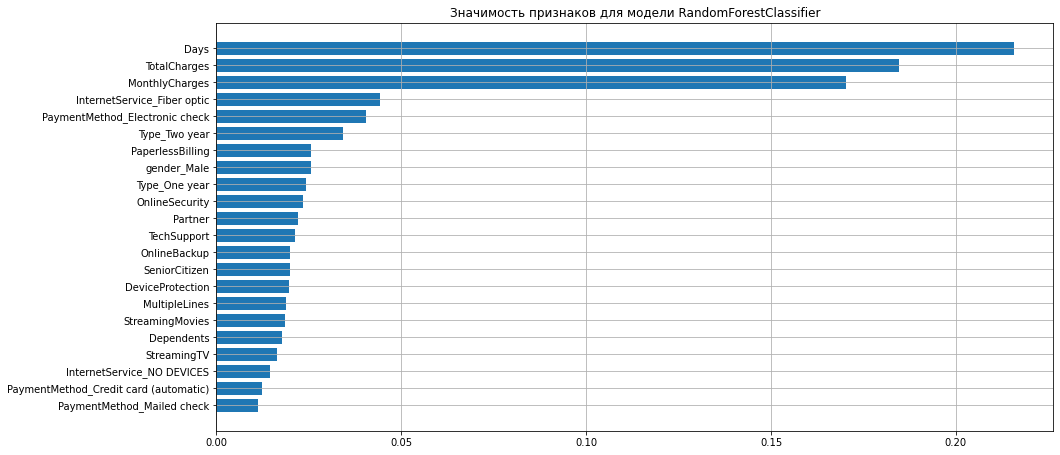

In [ ]:
test.take_res(RandomForestClassifier())

**CatBoost**

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 3/5; 3/18] END mod__class_weight=balanced, mod__criterion=gini, mod__max_depth=1, mod__n_estimators=20, mod__random_state=250722; total time=   0.2s
[CV 4/5; 3/18] START mod__class_weight=balanced, mod__criterion=gini, mod__max_depth=1, mod__n_estimators=20, mod__random_state=250722
[CV 4/5; 3/18] END mod__class_weight=balanced, mod__criterion=gini, mod__max_depth=1, mod__n_estimators=20, mod__random_state=250722; total time=   0.2s
[CV 5/5; 3/18] START mod__class_weight=balanced, mod__criterion=gini, mod__max_depth=1, mod__n_estimators=20, mod__random_state=250722
[CV 5/5; 3/18] END mod__class_weight=balanced, mod__criterion=gini, mod__max_depth=1, mod__n_estimators=20, mod__random_state=250722; total time=   0.2s
[CV 1/5; 4/18] START mod__class_weight=balanced, mod__criterion=gini, mod__max_depth=15, mod__n_estimators=80, mod__random_state=250722
[CV 1/5; 4/18] END mod__class_weight=balanced, mod__criterion=gini, mod__ma

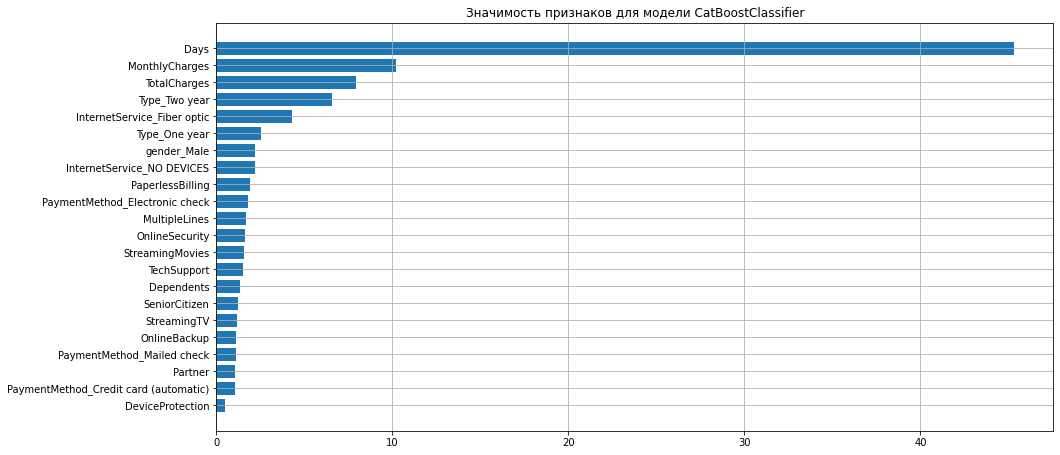

In [ ]:
test.take_res(CatBoostClassifier())

**LGBM**

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 2/5; 2/9] END mod__auto_class_weights=Balanced, mod__depth=10, mod__iterations=25, mod__learning_rate=0.4, mod__logging_level=Silent, mod__min_data_in_leaf=2, mod__random_seed=250722, mod__thread_count=-1; total time=   2.2s
[CV 5/5; 2/9] START mod__auto_class_weights=Balanced, mod__depth=10, mod__iterations=25, mod__learning_rate=0.4, mod__logging_level=Silent, mod__min_data_in_leaf=2, mod__random_seed=250722, mod__thread_count=-1
[CV 5/5; 2/9] END mod__auto_class_weights=Balanced, mod__depth=10, mod__iterations=25, mod__learning_rate=0.4, mod__logging_level=Silent, mod__min_data_in_leaf=2, mod__random_seed=250722, mod__thread_count=-1; total time=   2.1s
[CV 3/5; 3/9] START mod__auto_class_weights=Balanced, mod__depth=10, mod__iterations=25, mod__learning_rate=0.4, mod__logging_level=Silent, mod__min_data_in_leaf=15, mod__random_seed=250722, mod__thread_count=-1
[CV 3/5; 3/9] END mod__auto_class_weights=Balanced, mod__

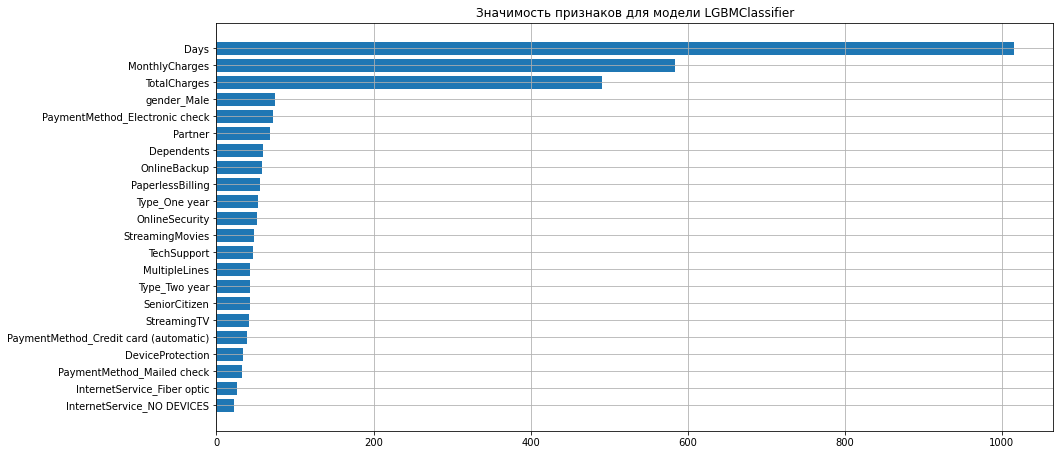

In [ ]:
test.take_res(LGBMClassifier())

Посмотрим на итоговые результаты:

In [ ]:
test.report()

,Train score (ROC-AUC),Train score (ACCURACY),Test score (ROC-AUC),Test score (ACCURACY)
LogisticRegression,0.847191,0.745956,0.841295,0.749822
RandomForestClassifier,0.853691,0.813511,0.854492,0.815920
CatBoostClassifier,0.863349,0.818311,0.878386,0.841507
LGBMClassifier,0.904319,0.843911,0.910681,0.862118


В результате получили следующие результаты:

* Самый лучший результат на тестовой выборке представила модель `LGBMClassifier`
    * `roc_auc_score`: 0.91;
    * `accuracy`: 0.86;
* Худший результат на тестовой выборке представила модель `CatBoostClassifier`
     * `roc_auc_score`: 0.84;
     * `accuracy`: 0.74;

Попробуем улучшить метрику с помощью фильтрации выбросов, а также провести выбор наиболее значимых признаков. Дополнительно сделаем проверку на мультиколлинеарность


**Преобразование данных** <a id="6_3"></a>

Теперь попробуем избавиться от аномальных значений в выборке. Из исследовательского анализа данных вспомним, что по признаку `TotalCharges` для клиентов, которые ушли, мы увидели выбросы в данных. 

Мы сделаем отсев последних 5% по клиентам, которые ушли. 

Важно: в этом случае, все клиенты, которые не закрывали договор, должны остаться. Фильтрация должна быть только по тем, кто ушел.

In [ ]:
limit_val = final_df[final_df.Exited == 1]['TotalCharges'].quantile(.95)
customerID = final_df[(final_df.Exited == 1) & (final_df.TotalCharges <= limit_val)].index
final_df = final_df[(final_df['Exited'] == 0) | final_df.index.isin(customerID)]

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6938 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PaperlessBilling                       6938 non-null   int8   
 1   MonthlyCharges                         6938 non-null   float64
 2   TotalCharges                           6938 non-null   float64
 3   Exited                                 6938 non-null   int8   
 4   SeniorCitizen                          6938 non-null   int64  
 5   Partner                                6938 non-null   int8   
 6   Dependents                             6938 non-null   int8   
 7   MultipleLines                          6938 non-null   int8   
 8   OnlineSecurity                         6938 non-null   int8   
 9   OnlineBackup                           6938 non-null   int8   
 10  DeviceProtection                       6938 non-null   int8   
 11  Tech

Теперь посмотрим на значимость признаков.

На основе первичного обучения видим, что наиболее значимыми признаками для моделей являются:

* `Days`;
* `MonthlyCharges`;
* `TotalCharges`;
* `InternetService_Fiber optic`
* `Type_Two year`

Оставим только их и проверим на мультиколлинеарность:


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6938 entries, 0 to 7031
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Days                         6938 non-null   int32  
 1   MonthlyCharges               6938 non-null   float64
 2   TotalCharges                 6938 non-null   float64
 3   InternetService_Fiber optic  6938 non-null   uint8  
 4   Type_Two year                6938 non-null   uint8  
 5   Exited                       6938 non-null   int8   
dtypes: float64(2), int32(1), int8(1), uint8(2)
memory usage: 210.0 KB


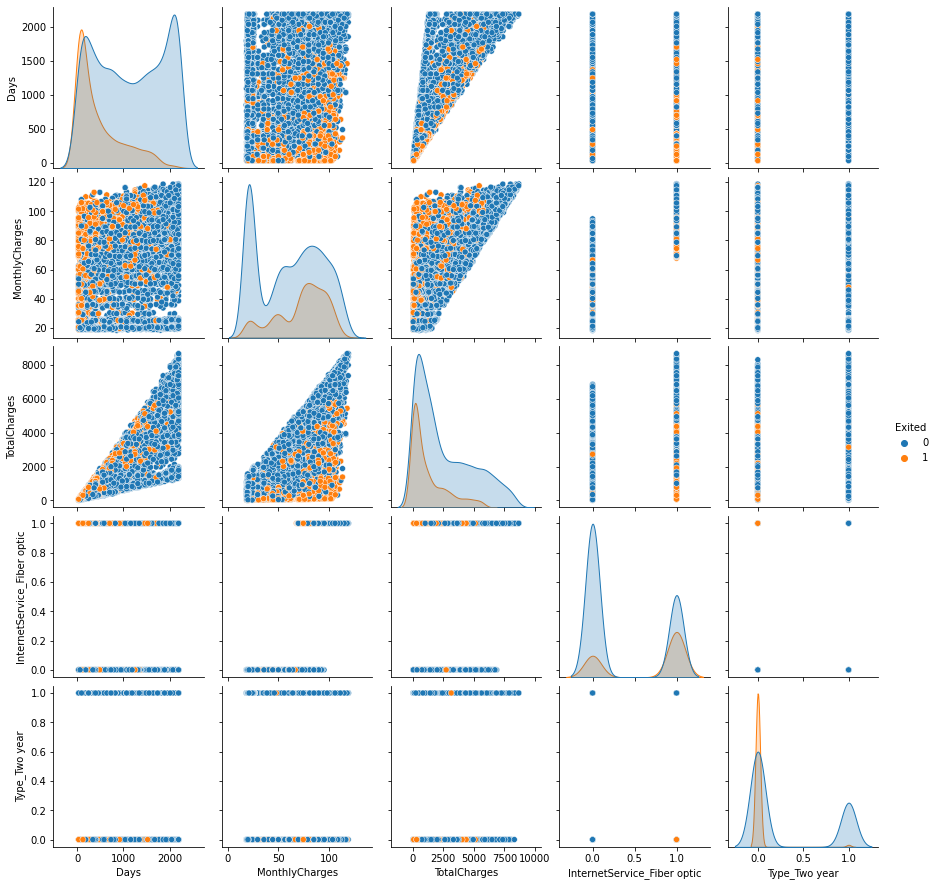

In [ ]:
final_df = final_df[['Days',
                    'MonthlyCharges',
                    'TotalCharges',
                    'InternetService_Fiber optic',
                    'Type_Two year',
                    'Exited']]
final_df.info()

sns.pairplot(data = final_df, hue = 'Exited');

Видим, что у нас имеется сильная корреляция между:

* `TotalCharges`;
* `MonthlyCharges`;
* `Days`.

Поэтому избавимся от параметра `TotalCharges` и перейдем к финальному тестированию.

In [ ]:
final_df = final_df.drop('TotalCharges', axis = 1)

**Финальное тестирование** <a id="6_4"></a>

Теперь попробуем обучить:

In [ ]:
test = models(final_df)

**Логистическая регрессия**

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 19/27] START mod__class_weight=balanced, mod__learning_rate=0.4, mod__max_depth=5, mod__n_estimators=5, mod__n_jobs=3, mod__num_leaves=5, mod__random_state=250722
[CV 1/5; 19/27] END mod__class_weight=balanced, mod__learning_rate=0.4, mod__max_depth=5, mod__n_estimators=5, mod__n_jobs=3, mod__num_leaves=5, mod__random_state=250722; total time=   0.3s
[CV 2/5; 19/27] START mod__class_weight=balanced, mod__learning_rate=0.4, mod__max_depth=5, mod__n_estimators=5, mod__n_jobs=3, mod__num_leaves=5, mod__random_state=250722
[CV 2/5; 19/27] END mod__class_weight=balanced, mod__learning_rate=0.4, mod__max_depth=5, mod__n_estimators=5, mod__n_jobs=3, mod__num_leaves=5, mod__random_state=250722; total time=   0.8s
[CV 4/5; 19/27] START mod__class_weight=balanced, mod__learning_rate=0.4, mod__max_depth=5, mod__n_estimators=5, mod__n_jobs=3, mod__num_leaves=5, mod__random_state=250722
[CV 4/5; 19/27] END mod__class_weight=balanc

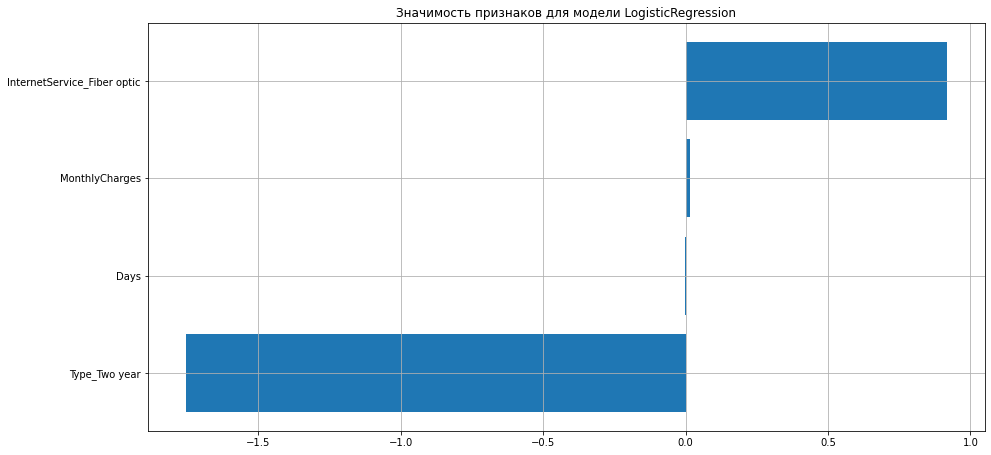

In [ ]:
test.take_res(LogisticRegression())

**Случайный лес**

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 3/5; 3/6] START mod__C=20, mod__class_weight=balanced, mod__max_iter=500, mod__penalty=l1, mod__random_state=250722, mod__solver=liblinear
[CV 3/5; 3/6] END mod__C=20, mod__class_weight=balanced, mod__max_iter=500, mod__penalty=l1, mod__random_state=250722, mod__solver=liblinear; total time=   0.0s
[CV 4/5; 3/6] START mod__C=20, mod__class_weight=balanced, mod__max_iter=500, mod__penalty=l1, mod__random_state=250722, mod__solver=liblinear
[CV 4/5; 3/6] END mod__C=20, mod__class_weight=balanced, mod__max_iter=500, mod__penalty=l1, mod__random_state=250722, mod__solver=liblinear; total time=   0.1s
[CV 4/5; 4/6] START mod__C=20, mod__class_weight=balanced, mod__max_iter=500, mod__penalty=l2, mod__random_state=250722, mod__solver=liblinear
[CV 4/5; 4/6] END mod__C=20, mod__class_weight=balanced, mod__max_iter=500, mod__penalty=l2, mod__random_state=250722, mod__solver=liblinear; total time=   0.1s
[CV 5/5; 4/6] START mod__C=

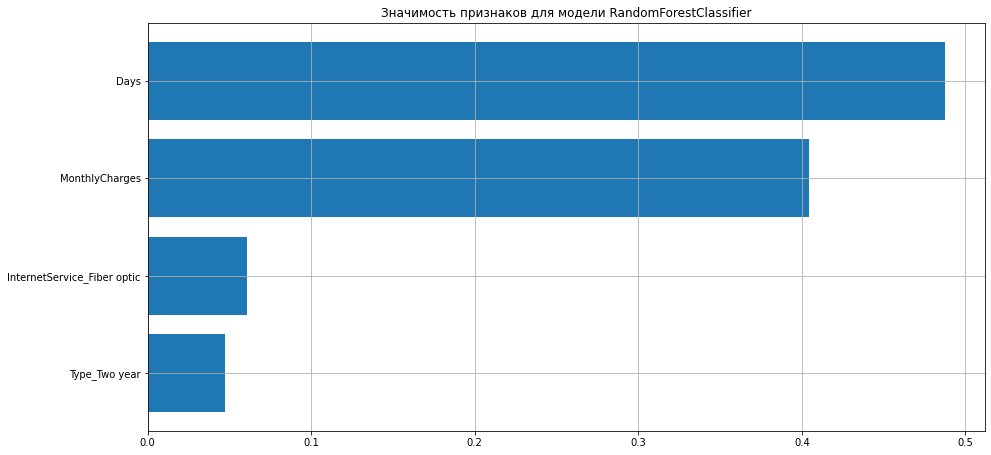

In [ ]:
test.take_res(RandomForestClassifier())

**CatBoost**

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 9/18] START mod__class_weight=balanced, mod__criterion=gini, mod__max_depth=5, mod__n_estimators=20, mod__random_state=250722
[CV 1/5; 9/18] END mod__class_weight=balanced, mod__criterion=gini, mod__max_depth=5, mod__n_estimators=20, mod__random_state=250722; total time=   0.2s
[CV 2/5; 9/18] START mod__class_weight=balanced, mod__criterion=gini, mod__max_depth=5, mod__n_estimators=20, mod__random_state=250722
[CV 2/5; 9/18] END mod__class_weight=balanced, mod__criterion=gini, mod__max_depth=5, mod__n_estimators=20, mod__random_state=250722; total time=   0.2s
[CV 3/5; 9/18] START mod__class_weight=balanced, mod__criterion=gini, mod__max_depth=5, mod__n_estimators=20, mod__random_state=250722
[CV 3/5; 9/18] END mod__class_weight=balanced, mod__criterion=gini, mod__max_depth=5, mod__n_estimators=20, mod__random_state=250722; total time=   0.2s
[CV 4/5; 9/18] START mod__class_weight=balanced, mod__criterion=gini, mod__m

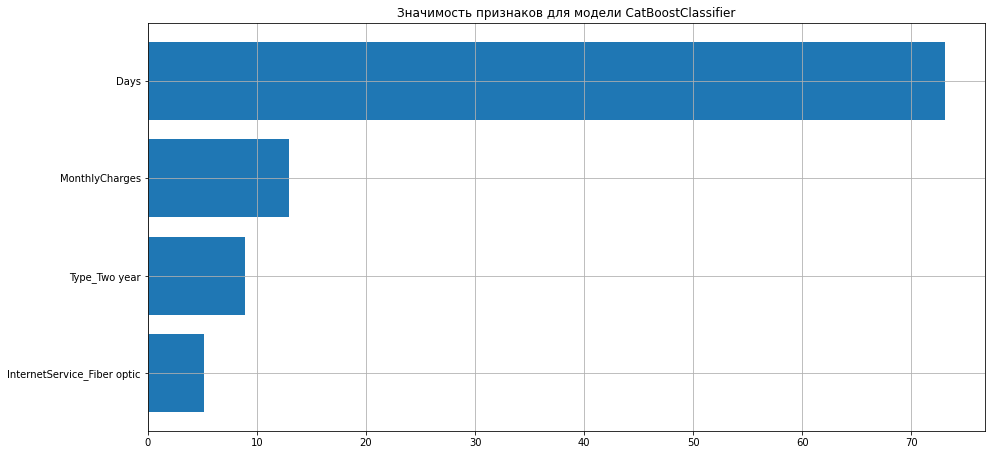

In [ ]:
test.take_res(CatBoostClassifier())

**LGBM**

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 3/5; 5/9] END mod__auto_class_weights=Balanced, mod__depth=10, mod__iterations=300, mod__learning_rate=0.4, mod__logging_level=Silent, mod__min_data_in_leaf=2, mod__random_seed=250722, mod__thread_count=-1; total time=   7.6s
[CV 1/5; 6/9] START mod__auto_class_weights=Balanced, mod__depth=10, mod__iterations=300, mod__learning_rate=0.4, mod__logging_level=Silent, mod__min_data_in_leaf=15, mod__random_seed=250722, mod__thread_count=-1
[CV 1/5; 6/9] END mod__auto_class_weights=Balanced, mod__depth=10, mod__iterations=300, mod__learning_rate=0.4, mod__logging_level=Silent, mod__min_data_in_leaf=15, mod__random_seed=250722, mod__thread_count=-1; total time=   7.2s
[CV 3/5; 6/9] START mod__auto_class_weights=Balanced, mod__depth=10, mod__iterations=300, mod__learning_rate=0.4, mod__logging_level=Silent, mod__min_data_in_leaf=15, mod__random_seed=250722, mod__thread_count=-1
[CV 3/5; 6/9] END mod__auto_class_weights=Balanced,

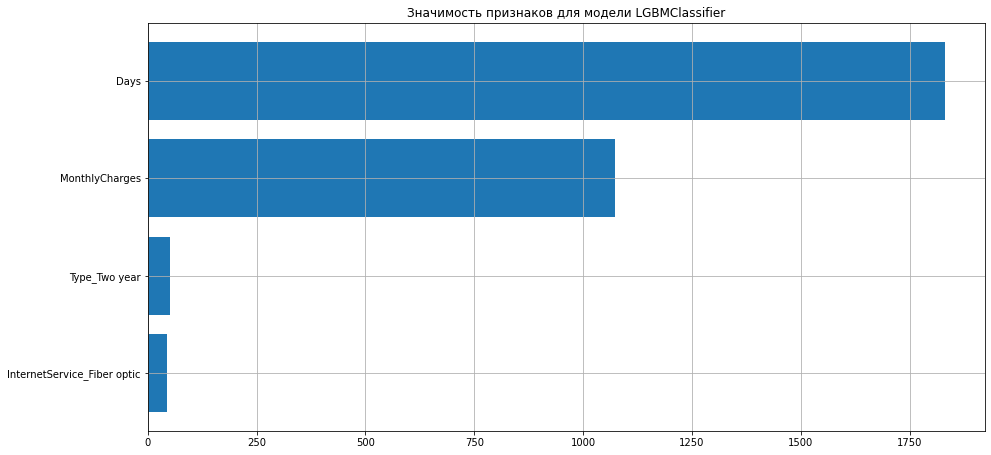

In [ ]:
test.take_res(LGBMClassifier())

Посмотрим на результаты:

In [ ]:
test.report()

,Train score (ROC-AUC),Train score (ACCURACY),Test score (ROC-AUC),Test score (ACCURACY)
LogisticRegression,0.839731,0.728829,0.847647,0.746398
RandomForestClassifier,0.878881,0.824144,0.890107,0.841499
CatBoostClassifier,0.924383,0.871351,0.925644,0.880403
LGBMClassifier,0.933290,0.863063,0.936692,0.859510


[CV 1/5; 20/27] START mod__class_weight=balanced, mod__learning_rate=0.4, mod__max_depth=5, mod__n_estimators=5, mod__n_jobs=3, mod__num_leaves=300, mod__random_state=250722
[CV 1/5; 20/27] END mod__class_weight=balanced, mod__learning_rate=0.4, mod__max_depth=5, mod__n_estimators=5, mod__n_jobs=3, mod__num_leaves=300, mod__random_state=250722; total time=   0.2s
[CV 3/5; 20/27] START mod__class_weight=balanced, mod__learning_rate=0.4, mod__max_depth=5, mod__n_estimators=5, mod__n_jobs=3, mod__num_leaves=300, mod__random_state=250722
[CV 3/5; 20/27] END mod__class_weight=balanced, mod__learning_rate=0.4, mod__max_depth=5, mod__n_estimators=5, mod__n_jobs=3, mod__num_leaves=300, mod__random_state=250722; total time=   0.2s
[CV 3/5; 21/27] START mod__class_weight=balanced, mod__learning_rate=0.4, mod__max_depth=5, mod__n_estimators=5, mod__n_jobs=3, mod__num_leaves=25, mod__random_state=250722
[CV 3/5; 21/27] END mod__class_weight=balanced, mod__learning_rate=0.4, mod__max_depth=5, mod__

В итоге, получили следующие результаты:

В результате получили следующие результаты:

* Самый лучший результат на тестовой выборке представила модель `LGBMClassifier`
    * `roc_auc_score`: 0.93;
    * `accuracy`: 0.86;
* Худший результат на тестовой выборке представила модель `LogisticRegression`
     * `roc_auc_score`: 0.84;
     * `accuracy`: 0.76;

### Общий вывод <a id="7"></a>

Была дана задача:

> Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

Для выполнения задания заказчик предоставил данные о клиентах.

В результате знакомства с данными были обнаружены проблемы, из-за которых нельзы было продолжить исследование и реализовать прогноз ухода клиента. В результате предобработки, данные были готовы для дальнейшего исследования. 

|**Таблица**  |**Обнаруженные прроблемы**|**Вариант решения проблемы**|**Статус решения проблемы**|
|:---------:  |:------------------------ |:-------------------------- |:--------------------------|
|**Contract**|**Имеется некорректный тип данных для некоторых признаков**|**изменить тип данных**|**Данные приведены к корректному типу**|
|             |`BeginDate`:`object`|Привести к типу `datetime`|
|             |`EndDate`:`object`|Привести к типу `datetime`|
|             |`TotalCharges`:`object`|Привести к типу `float`|
|             |**Категориальный признак `PaperlessBilling` представлен в некорректном виде**|**привести к соответствующим значениям**|**признак приведен к соответсвующим значениям**|
|             |                                                                         |`0` - `No`                          | 
|             |                                                                         |`1` - `Yes`                         | 
|**Internet** |**Категориальные признаки представлены в некорректном виде**|**привести к соответствующим значениям**         |**признаки приведены к соответсвующим значениям**|
|             |                                                                         |`0` - `No`                          | 
|             |                                                                         |`1` - `Yes`                         | 
|**Personal** |**Категориальные признаки представлены в некорректном виде**|**привести к соответствующим значениям**         |**признаки приведены к соответсвующим значениям**|
|             |                                                                         |`0` - `No`                          | 
|             |                                                                         |`1` - `Yes`                         | 
|**Phone**    |**Категориальные признаки представлены в некорректном виде**|**привести к соответствующим значениям**         |**признаки приведены к соответсвующим значениям**|
|             |                                                                         |`0` - `No`                          | 
|             |                                                                         |`1` - `Yes`                         |
|**Common issues**|**Нет целевого признака**|**сформировать целвой признак**|**целевой признак сформирован к соответсвующим значениям**|
|                 |                         |                               |`1` - **клиент ушел**;|
|                 |                         |                               |`0` - **клиент остался**;|

После предобработки данных мы приступили к исследовательской части проекта, в результате которой мы установили следующее:

* Этап: заключение договора:
    * Клиенты, которые остались, чаще всего заключали договоры в 2014 и 2019 годах;
    * Самый популярный месяц для заключения договора среди оставшихся клиентов: февраль и январь;
    * Клиенты, которые ушли, чаще всего заключали договоры в 2019 году;
    * Самый популярный месяц: сентябрь
    
* Этап: расторжение договора:
    * Чаще всего, клиенты расторгали договор в 2019 году;
    * Самый популярный месяц для расторжения договора: ноябрь;

* Итоговая выручка:
    * Для клиентов, которые ушли:
        * Средняя выручка: 1531 у.е.;
        * Медианная выручка: 703.5 у.е.;
        * Минимальная выручка: 18.85 у.е.;
        * Максимальная выручка: 8684 у.е.;
    * Для клиентов, которые остались:
        * Средняя выручка: 2555 у.е.;
        * Медианная выручка: 1683.6 у.е.;
        * Минимальная выручка: 18.80 у.е.;
        * Максимальная выручка: 8672 у.е.;  

* Ежемесячная выручка: 

    * Для клиентов, которые ушли:
        * Средняя ежемесячная выплата: 74 у.е.;
        * Медианная выплата: 80 у.е.;
        * Минимальная выплата: 18.85 у.е.;
        * Максимальная выплата: 118.35 у.е.;
    * Для клиентов, которые остались:
        * Средняя выплата: 61.3 у.е.;
        * Медианная выплата: 64.45 у.е;
        * Минимальная выплата: 18.25 у.е.;
        * Максимальная выплата: 118.75 у.е.

* Услуги компании:
    * Люди предпочитают не платить за доплнительные услуги;
    * Самые непопулярные услуги:
        * техническая поддеркжа;
        * защита от небезопасных сайтов;
    * Самые популярные услуги:
        * подключение к нескольким линиям связи;
        * трансляция ТВ;
        * трансялция фильмов; 

* Тип интернет-соединения:
    * Самый популярный тип интернет-соединения среди клиентов, которые расторгли договор - оптоволкно;
    * Клиенты независимо от статуса предпочитают подключать интернет, чем быть без него.

* Тип договора:
    * Чаще всего клиенты предопчитают пользоваться договором категории 'ежемесячно';
    * Клиенты, которые ушли, чаще всего предпочитали договоры категории 'ежемесячно';
    * Клиенты, которые остались, предпочитают договоры категорий: 'ежемесячно' и 'на два года'.

* Семейный статус:
    * Независимо от категории клиентов, болшинство клиентов имеют супругу;
    * Самая популярная группа клиентов - люди молодые и среднего ворзраста;
    * Наименее популярная группа клиентов - пожилые люди.

* Дней действия договора: 
    * Клиенты, которые ушли, пользовались услугами компании менее 50 дней.
    * У клиентов, которые остались, время действия договора на момент выгрузки данных составляет менее 50 дней и более 2000 дней.

В процессе исследования проверили следующие гипотезы:

* Средняя ежемесячная выручка между клиентами разных групп одинакова;
* Среднее количество дней с момента действия договора одинаково;

В результате проверки получили следущие результаты: 

* Средняя ежемесячная выручка между клиентами разных групп разная;
* Среднее количество дней с момента действия договора разное;

Таким образом, мы получили портрет клиента, который перестал пользоваться услугами:

* В среднем ежемесячно платил больше, чем постоянные клиенты;
* Популярные услуги:
    * подключение к нескольким линиям связи;
    * трансляция ТВ;
    * трансялция фильмов; 
* Самый популярный год подключения: 2019 год;
* Самый популярный месяц подключения: сентябрь;
* Самый популярный год расторжения: 2019 год;
* Самый популярный год расторжения: ноябрь.

После чего мы приступили к обучению моделей.

В процессе обучения выяснили, что целевой признак несбалансирован и учли это при обучении разных моделей. Также учли, что некоторые признаки необходимо закодировать. Для кодирования признаков использовали метод OHE.

В результате первичного обучения получили следующие результаты:

* Самый лучший результат на тестовой выборке представила модель `LGBMClassifier`
    * `roc_auc_score`: 0.91;
    * `accuracy`: 0.82;
* Худший результат на тестовой выборке представила модель `CatBoostClassifier`
     * `roc_auc_score`: 0.84;
     * `accuracy`: 0.81;

По результатам первичного обучения было предложено улучшить качество метрики следующими способами:

* Фильтрация аномальных значений;
* Выбор наиболее значимых признаков.
* Проверка на мультколлинеарность с последующим удалением одного из сильно коррелируемых признаков.

После преобразования данных и повторого эксперимента получили следующие результаты:

* Самый лучший результат на тестовой выборке представила модель `LGBMClassifier`
    * `roc_auc_score`: 0.93;
    * `accuracy`: 0.86;
* Худший результат на тестовой выборке представила модель `LogisticRegression`
     * `roc_auc_score`: 0.81;
     * `accuracy`: 0.76;